https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

# Day0328

In [1]:
!pip install seaborn --upgrade

In [2]:
!pip install koreanize_matplotlib

In [3]:
%config InlineBackend.figure_format = 'retina'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

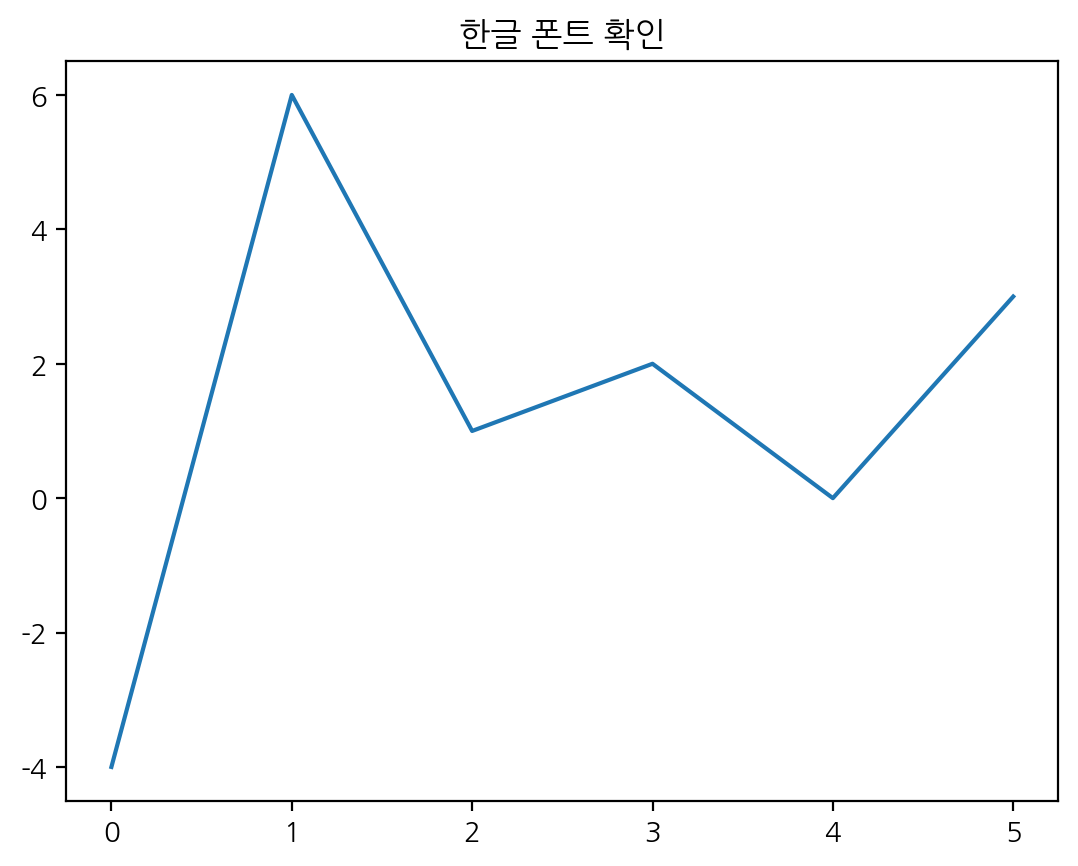

In [5]:
# 그래프 한글 적용 여부 확인
plt.title('한글 폰트 확인')
plt.plot([-4,6,1,2,0,3])

In [6]:
df = pd.read_csv('./소상공인시장진흥공단_상가(상권)정보_서울_202412.csv')
df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220700009628,홈처치스쿨,NaN,P1,교육,P107,교육 지원,P10799,기타 교육지원 서비스업,P85709,...,1123011000102560217000901,NaN,서울특별시 동대문구 신이문로8길 5,130827,2411,NaN,NaN,NaN,127.063553,37.602687
1,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,...,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.981840,37.586250
2,MA010120220800000036,한국황토건축연구소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,1165010800113080025020133,강남오피스텔,서울특별시 서초구 서초대로73길 40,137856,6612,NaN,11,NaN,127.024563,37.500924
3,MA010120220800000077,소망공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,1120012200100040011000899,NaN,서울특별시 성동구 용답중앙15길 18,133847,4805,NaN,1,NaN,127.054262,37.564786
4,MA010120220800000084,고향집,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1111015400100800000000001,NaN,서울특별시 종로구 돈화문로4길 30,110430,3193,NaN,NaN,NaN,126.993820,37.570025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553530,MA0106202201A1649562,환명상원,NaN,S2,수리·개인,S207,이용·미용,S20701,미용실,S96112,...,1111017000100770000008442,NaN,서울특별시 종로구 성균관로 44,110530,3069,NaN,NaN,NaN,126.996819,37.586603
553531,MA0106202201A0125744,올리스푼,NaN,G2,소매,G221,기타 상품 소매,G22199,그 외 기타 상품 전문 소매업,G47859,...,1150010300107890019020562,NaN,서울특별시 강서구 곰달래로60가길 46,157897,7785,NaN,NaN,NaN,126.860663,37.530082
553532,MA010120220808362513,스튜디오익센트릭,NaN,M1,과학·기술,M112,전문 디자인,M11203,시각 디자인업,M73203,...,1168010800102180017027140,NaN,서울특별시 강남구 언주로121길 4-5,135829,6106,NaN,2,NaN,127.035007,37.512004
553533,MA010120220804126513,두찜강남,논현점,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1168010800102180017027140,NaN,서울특별시 강남구 언주로121길 4-5,135829,6106,NaN,1,NaN,127.035007,37.512004


In [7]:
# 행, 열 갯수 파악
df.shape

(553535, 39)

In [8]:
# 행 개수
df.shape[0]

553535

In [9]:
# 열 개수
df.shape[1]

39

In [10]:
# 행 출력 default -> 60, 열 출력 default -> 20
# 열 최대 출력 갯수 40개로 변경
pd.options.display.max_columns = 40
df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220700009628,홈처치스쿨,NaN,P1,교육,P107,교육 지원,P10799,기타 교육지원 서비스업,P85709,기타 교육지원 서비스업,11,서울특별시,11230,동대문구,11230750,이문2동,1123011000,이문동,1123011000102560217,1,대지,256.0,217.0,서울특별시 동대문구 이문동 256-217,112304115224,서울특별시 동대문구 신이문로8길,5.0,NaN,1123011000102560217000901,NaN,서울특별시 동대문구 신이문로8길 5,130827,2411,NaN,NaN,NaN,127.063553,37.602687
1,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,기타 비알코올 음료점업,11,서울특별시,11110,종로구,11110540,삼청동,1111014000,삼청동,1111014000100280021,1,대지,28.0,21.0,서울특별시 종로구 삼청동 28-21,111103100007,서울특별시 종로구 삼청로,122.0,1.0,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.981840,37.586250
2,MA010120220800000036,한국황토건축연구소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,부동산 중개 및 대리업,11,서울특별시,11650,서초구,11650531,서초4동,1165010800,서초동,1165010800113080025,1,대지,1308.0,25.0,서울특별시 서초구 서초동 1308-25,116504163432,서울특별시 서초구 서초대로73길,40.0,NaN,1165010800113080025020133,강남오피스텔,서울특별시 서초구 서초대로73길 40,137856,6612,NaN,11,NaN,127.024563,37.500924
3,MA010120220800000077,소망공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,부동산 중개 및 대리업,11,서울특별시,11200,성동구,11200790,용답동,1120012200,용답동,1120012200100040011,1,대지,4.0,11.0,서울특별시 성동구 용답동 4-11,112004109494,서울특별시 성동구 용답중앙15길,18.0,NaN,1120012200100040011000899,NaN,서울특별시 성동구 용답중앙15길 18,133847,4805,NaN,1,NaN,127.054262,37.564786
4,MA010120220800000084,고향집,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,한식 일반 음식점업,11,서울특별시,11110,종로구,11110615,종로1.2.3.4가동,1111015400,장사동,1111015400100800000,1,대지,80.0,NaN,서울특별시 종로구 장사동 80,111104100055,서울특별시 종로구 돈화문로4길,30.0,NaN,1111015400100800000000001,NaN,서울특별시 종로구 돈화문로4길 30,110430,3193,NaN,NaN,NaN,126.993820,37.570025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553530,MA0106202201A1649562,환명상원,NaN,S2,수리·개인,S207,이용·미용,S20701,미용실,S96112,두발 미용업,11,서울특별시,11110,종로구,11110650,혜화동,1111017000,명륜1가,1111017000100750001,1,대지,75.0,1.0,서울특별시 종로구 명륜1가 75-1,111103100008,서울특별시 종로구 성균관로,44.0,NaN,1111017000100770000008442,NaN,서울특별시 종로구 성균관로 44,110530,3069,NaN,NaN,NaN,126.996819,37.586603
553531,MA0106202201A0125744,올리스푼,NaN,G2,소매,G221,기타 상품 소매,G22199,그 외 기타 상품 전문 소매업,G47859,그 외 기타 분류 안된 상품 전문 소매업,11,서울특별시,11500,강서구,11500570,화곡4동,1150010300,화곡동,1150010300107890019,1,대지,789.0,19.0,서울특별시 강서구 화곡동 789-19,115004145165,서울특별시 강서구 곰달래로60가길,46.0,NaN,1150010300107890019020562,NaN,서울특별시 강서구 곰달래로60가길 46,157897,7785,NaN,NaN,NaN,126.860663,37.530082
553532,MA010120220808362513,스튜디오익센트릭,NaN,M1,과학·기술,M112,전문 디자인,M11203,시각 디자인업,M73203,시각 디자인업,11,서울특별시,11680,강남구,11680531,논현2동,1168010800,논현동,1168010800102180017,1,대지,218.0,17.0,서울특별시 강남구 논현동 218-17,116804166568,서울특별시 강남구 언주로121길,4.0,5.0,1168010800102180017027140,NaN,서울특별시 강남구 언주로121길 4-5,135829,6106,NaN,2,NaN,127.035007,37.512004
553533,MA010120220804126513,두찜강남,논현점,I2,음식,I201,한식,I20101,백반/한정식,I56111,한식 일반 음식점업,11,서울특별시,11680,강남구,11680531,논현2동,1168010800,논현동,1168010800102180017,1,대지,218.0,17.0,서울특별시 강남구 논현동 218-17,116804166568,서울특별시 강남구 언주로121길,4.0,5.0,1168010800102180017027140,NaN,서울특별시 강남구 언주로121길 4-5,135829,6106,NaN,1,NaN,127.035007,37.512004


In [11]:
# 위에서 5개 데이터 확인
df.head(5)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220700009628,홈처치스쿨,NaN,P1,교육,P107,교육 지원,P10799,기타 교육지원 서비스업,P85709,기타 교육지원 서비스업,11,서울특별시,11230,동대문구,11230750,이문2동,1123011000,이문동,1123011000102560217,1,대지,256.0,217.0,서울특별시 동대문구 이문동 256-217,112304115224,서울특별시 동대문구 신이문로8길,5.0,NaN,1123011000102560217000901,NaN,서울특별시 동대문구 신이문로8길 5,130827,2411,NaN,NaN,NaN,127.063553,37.602687
1,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,기타 비알코올 음료점업,11,서울특별시,11110,종로구,11110540,삼청동,1111014000,삼청동,1111014000100280021,1,대지,28.0,21.0,서울특별시 종로구 삼청동 28-21,111103100007,서울특별시 종로구 삼청로,122.0,1.0,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.981840,37.586250
2,MA010120220800000036,한국황토건축연구소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,부동산 중개 및 대리업,11,서울특별시,11650,서초구,11650531,서초4동,1165010800,서초동,1165010800113080025,1,대지,1308.0,25.0,서울특별시 서초구 서초동 1308-25,116504163432,서울특별시 서초구 서초대로73길,40.0,NaN,1165010800113080025020133,강남오피스텔,서울특별시 서초구 서초대로73길 40,137856,6612,NaN,11,NaN,127.024563,37.500924
3,MA010120220800000077,소망공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,부동산 중개 및 대리업,11,서울특별시,11200,성동구,11200790,용답동,1120012200,용답동,1120012200100040011,1,대지,4.0,11.0,서울특별시 성동구 용답동 4-11,112004109494,서울특별시 성동구 용답중앙15길,18.0,NaN,1120012200100040011000899,NaN,서울특별시 성동구 용답중앙15길 18,133847,4805,NaN,1,NaN,127.054262,37.564786
4,MA010120220800000084,고향집,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,한식 일반 음식점업,11,서울특별시,11110,종로구,11110615,종로1.2.3.4가동,1111015400,장사동,1111015400100800000,1,대지,80.0,NaN,서울특별시 종로구 장사동 80,111104100055,서울특별시 종로구 돈화문로4길,30.0,NaN,1111015400100800000000001,NaN,서울특별시 종로구 돈화문로4길 30,110430,3193,NaN,NaN,NaN,126.993820,37.570025


In [12]:
# 밑에서부터 5개 데이터 확인
df.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
553530,MA0106202201A1649562,환명상원,NaN,S2,수리·개인,S207,이용·미용,S20701,미용실,S96112,두발 미용업,11,서울특별시,11110,종로구,11110650,혜화동,1111017000,명륜1가,1111017000100750001,1,대지,75.0,1.0,서울특별시 종로구 명륜1가 75-1,111103100008,서울특별시 종로구 성균관로,44.0,NaN,1111017000100770000008442,NaN,서울특별시 종로구 성균관로 44,110530,3069,NaN,NaN,NaN,126.996819,37.586603
553531,MA0106202201A0125744,올리스푼,NaN,G2,소매,G221,기타 상품 소매,G22199,그 외 기타 상품 전문 소매업,G47859,그 외 기타 분류 안된 상품 전문 소매업,11,서울특별시,11500,강서구,11500570,화곡4동,1150010300,화곡동,1150010300107890019,1,대지,789.0,19.0,서울특별시 강서구 화곡동 789-19,115004145165,서울특별시 강서구 곰달래로60가길,46.0,NaN,1150010300107890019020562,NaN,서울특별시 강서구 곰달래로60가길 46,157897,7785,NaN,NaN,NaN,126.860663,37.530082
553532,MA010120220808362513,스튜디오익센트릭,NaN,M1,과학·기술,M112,전문 디자인,M11203,시각 디자인업,M73203,시각 디자인업,11,서울특별시,11680,강남구,11680531,논현2동,1168010800,논현동,1168010800102180017,1,대지,218.0,17.0,서울특별시 강남구 논현동 218-17,116804166568,서울특별시 강남구 언주로121길,4.0,5.0,1168010800102180017027140,NaN,서울특별시 강남구 언주로121길 4-5,135829,6106,NaN,2,NaN,127.035007,37.512004
553533,MA010120220804126513,두찜강남,논현점,I2,음식,I201,한식,I20101,백반/한정식,I56111,한식 일반 음식점업,11,서울특별시,11680,강남구,11680531,논현2동,1168010800,논현동,1168010800102180017,1,대지,218.0,17.0,서울특별시 강남구 논현동 218-17,116804166568,서울특별시 강남구 언주로121길,4.0,5.0,1168010800102180017027140,NaN,서울특별시 강남구 언주로121길 4-5,135829,6106,NaN,1,NaN,127.035007,37.512004
553534,MA0106202311A0600261,두찜강남,논현점,I2,음식,I201,한식,I20101,백반/한정식,I56111,한식 일반 음식점업,11,서울특별시,11680,강남구,11680531,논현2동,1168010800,논현동,1168010800102190033,1,대지,219.0,33.0,서울특별시 강남구 논현동 219-33,116804166568,서울특별시 강남구 언주로121길,10.0,NaN,1168010800102190033007613,NaN,서울특별시 강남구 언주로121길 10,135829,6106,NaN,2,NaN,127.034769,37.511608


In [13]:
# 인덱스 확인
df.index

RangeIndex(start=0, stop=553535, step=1)

In [14]:
# 컬럼 확인
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [15]:
# 열 데이터 탐색
df.dtypes

상가업소번호        object
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지        float64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지        float64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호          int64
동정보          float64
층정보           object
호정보          float64
경도           float64
위도           float64
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553535 entries, 0 to 553534
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     553535 non-null  object 
 1   상호명        553535 non-null  object 
 2   지점명        49419 non-null   object 
 3   상권업종대분류코드  553535 non-null  object 
 4   상권업종대분류명   553535 non-null  object 
 5   상권업종중분류코드  553535 non-null  object 
 6   상권업종중분류명   553535 non-null  object 
 7   상권업종소분류코드  553535 non-null  object 
 8   상권업종소분류명   553535 non-null  object 
 9   표준산업분류코드   553343 non-null  object 
 10  표준산업분류명    553343 non-null  object 
 11  시도코드       553535 non-null  int64  
 12  시도명        553535 non-null  object 
 13  시군구코드      553535 non-null  int64  
 14  시군구명       553535 non-null  object 
 15  행정동코드      553535 non-null  int64  
 16  행정동명       553535 non-null  object 
 17  법정동코드      553535 non-null  int64  
 18  법정동명       553535 non-null  object 
 19  지번코드       553535 non-n

In [17]:
df.describe

<bound method NDFrame.describe of                       상가업소번호         상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  \
0       MA010120220700009628       홈처치스쿨  NaN        P1       교육      P107   
1       MA010120220800000033    부동산임대김은숙  NaN        I2       음식      I212   
2       MA010120220800000036   한국황토건축연구소  NaN        L1      부동산      L102   
3       MA010120220800000077  소망공인중개사사무소  NaN        L1      부동산      L102   
4       MA010120220800000084         고향집  NaN        I2       음식      I201   
...                      ...         ...  ...       ...      ...       ...   
553530  MA0106202201A1649562        환명상원  NaN        S2    수리·개인      S207   
553531  MA0106202201A0125744        올리스푼  NaN        G2       소매      G221   
553532  MA010120220808362513    스튜디오익센트릭  NaN        M1    과학·기술      M112   
553533  MA010120220804126513        두찜강남  논현점        I2       음식      I201   
553534  MA0106202311A0600261        두찜강남  논현점        I2       음식      I201   

        상권업종중분류명 상권업종소분류코드   

# Day0331

In [18]:
# 결측치 확인
# isnull() == isna()
# 결측값 정보를 변수 n에 저장
n = df.isnull().sum()
n

상가업소번호            0
상호명               0
지점명          504116
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드        192
표준산업분류명         192
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지            60
지번부번지         93958
지번주소              0
도로명코드             0
도로명               0
건물본번지            10
건물부번지        481753
건물관리번호         1489
건물명          284203
도로명주소             0
구우편번호             0
신우편번호             0
동정보          553535
층정보          175429
호정보          553535
경도                0
위도                0
dtype: int64

<Axes: >

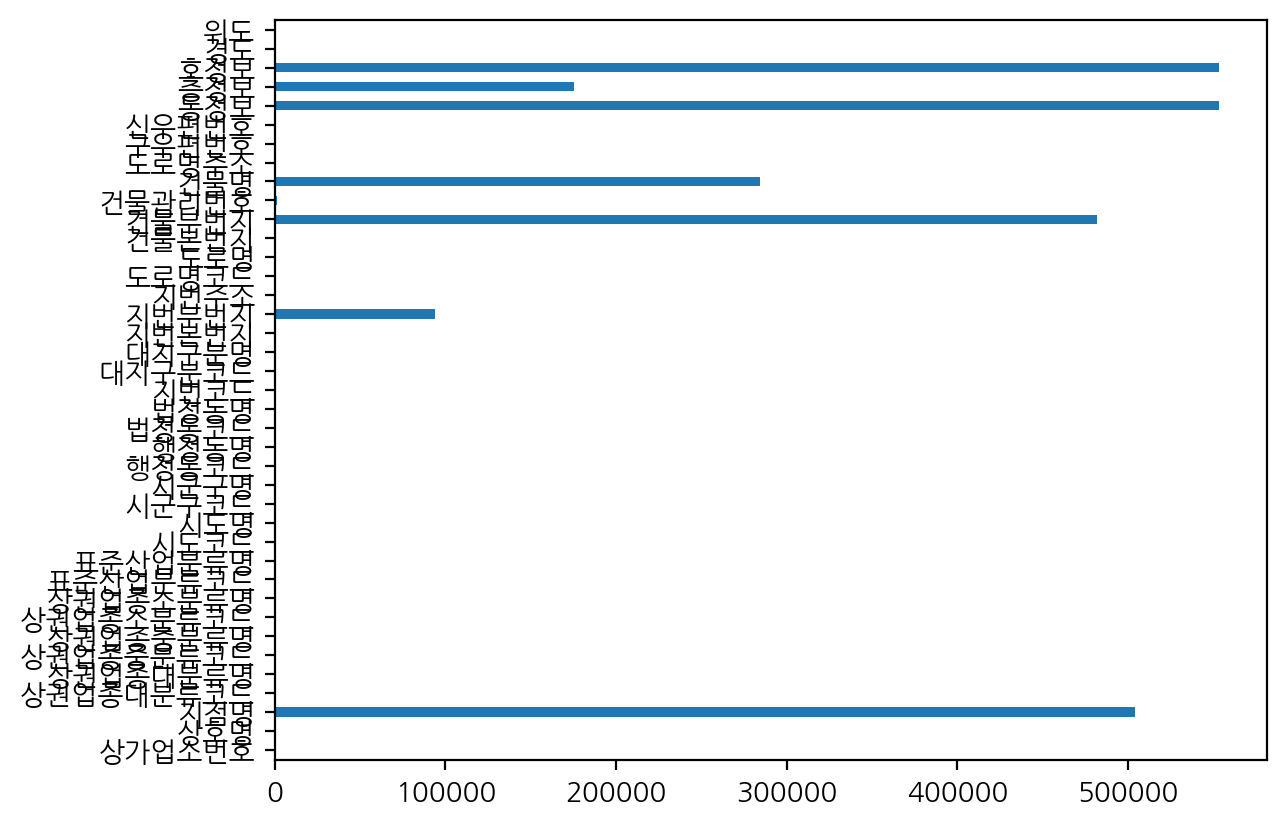

In [19]:
# 결측값을 막대그래프로 시각화
# barh() -> x축을 y축으로 바꿈
n.plot.barh()

<Axes: >

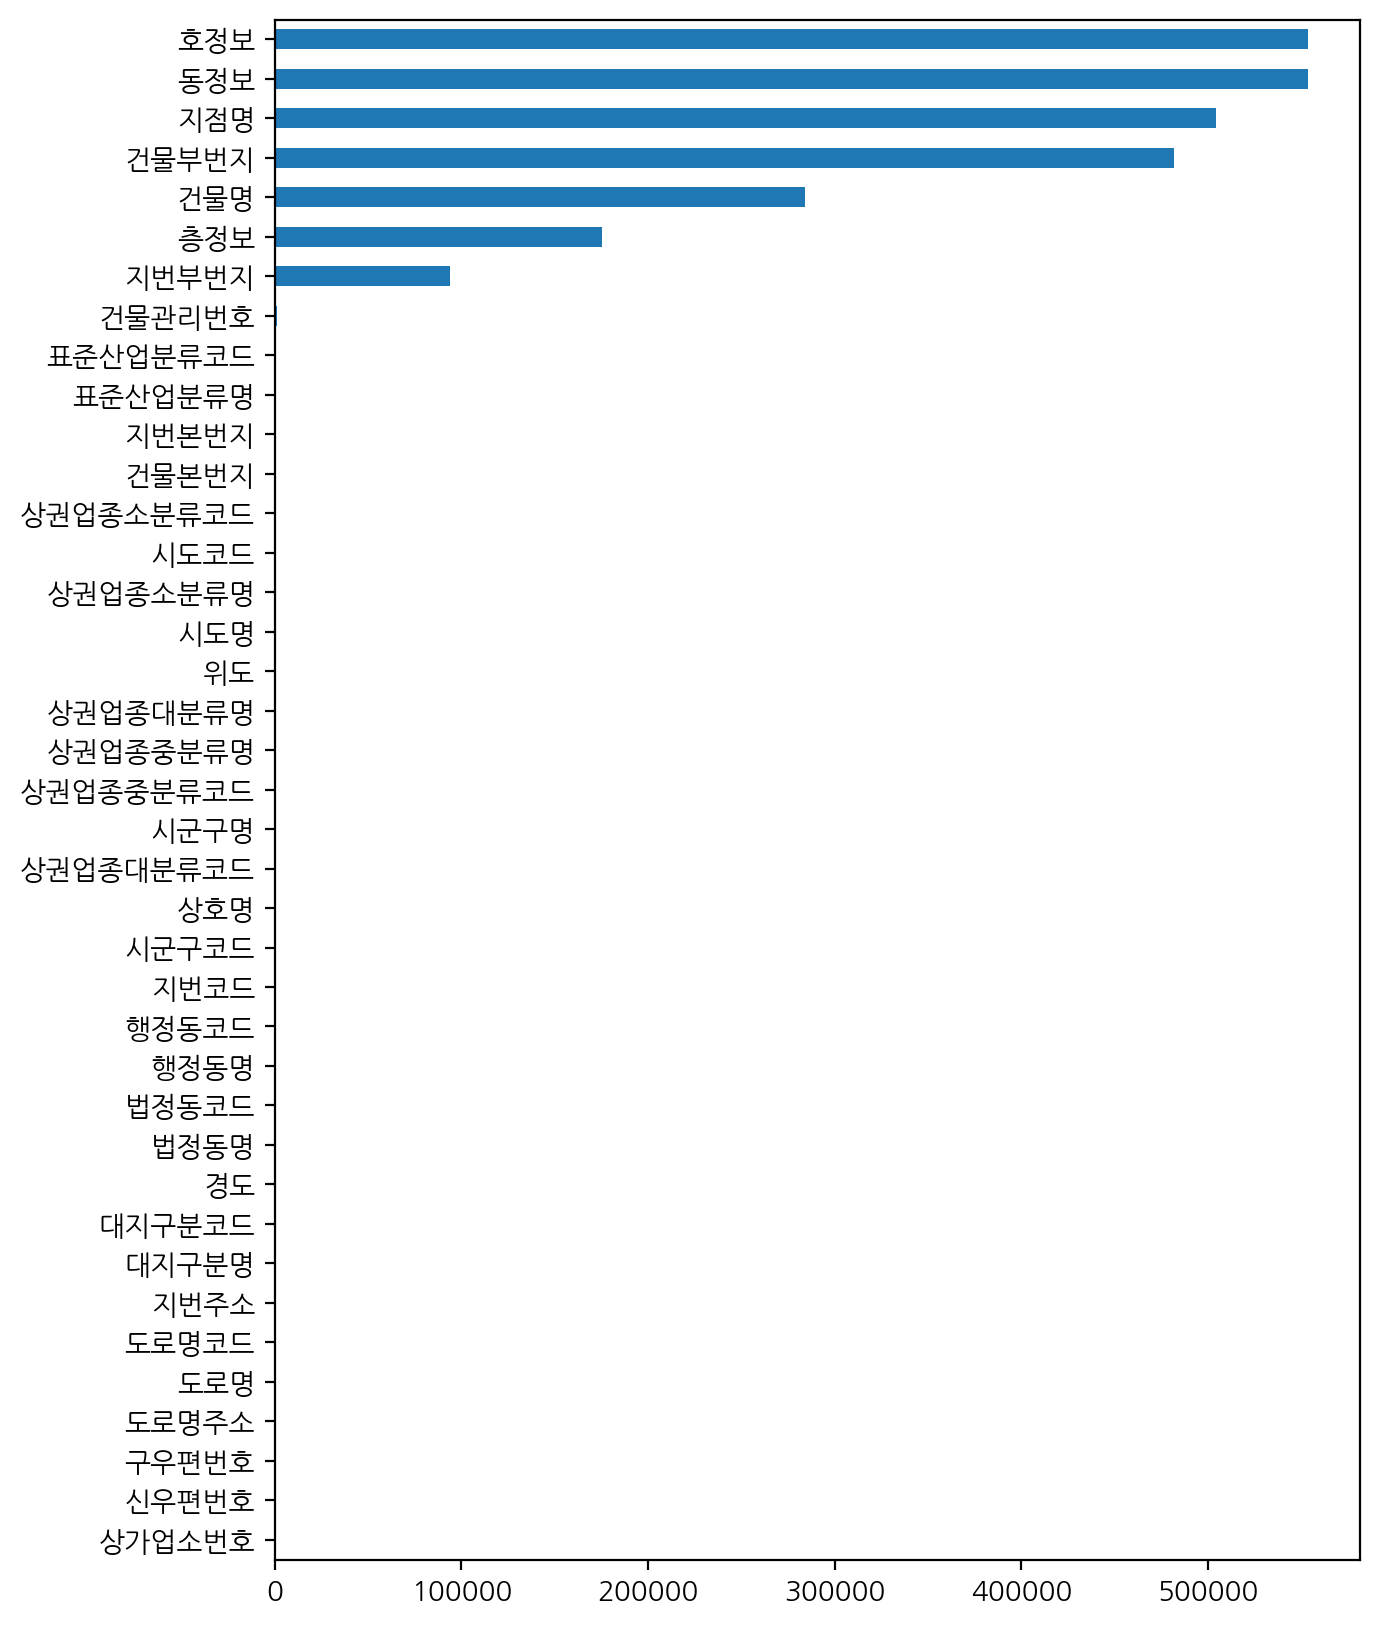

In [20]:
# 결측치 정렬해서 막대그래프로 시각화
# sort_values() -> 기본 정렬 기준 : 오름차순 (0 -> 100, a -> z, ㄱ -> ㅎ)

n.sort_values().plot.barh(figsize = (7,10))

In [21]:
!pip install missingno

In [22]:
import missingno as mn

<Axes: >

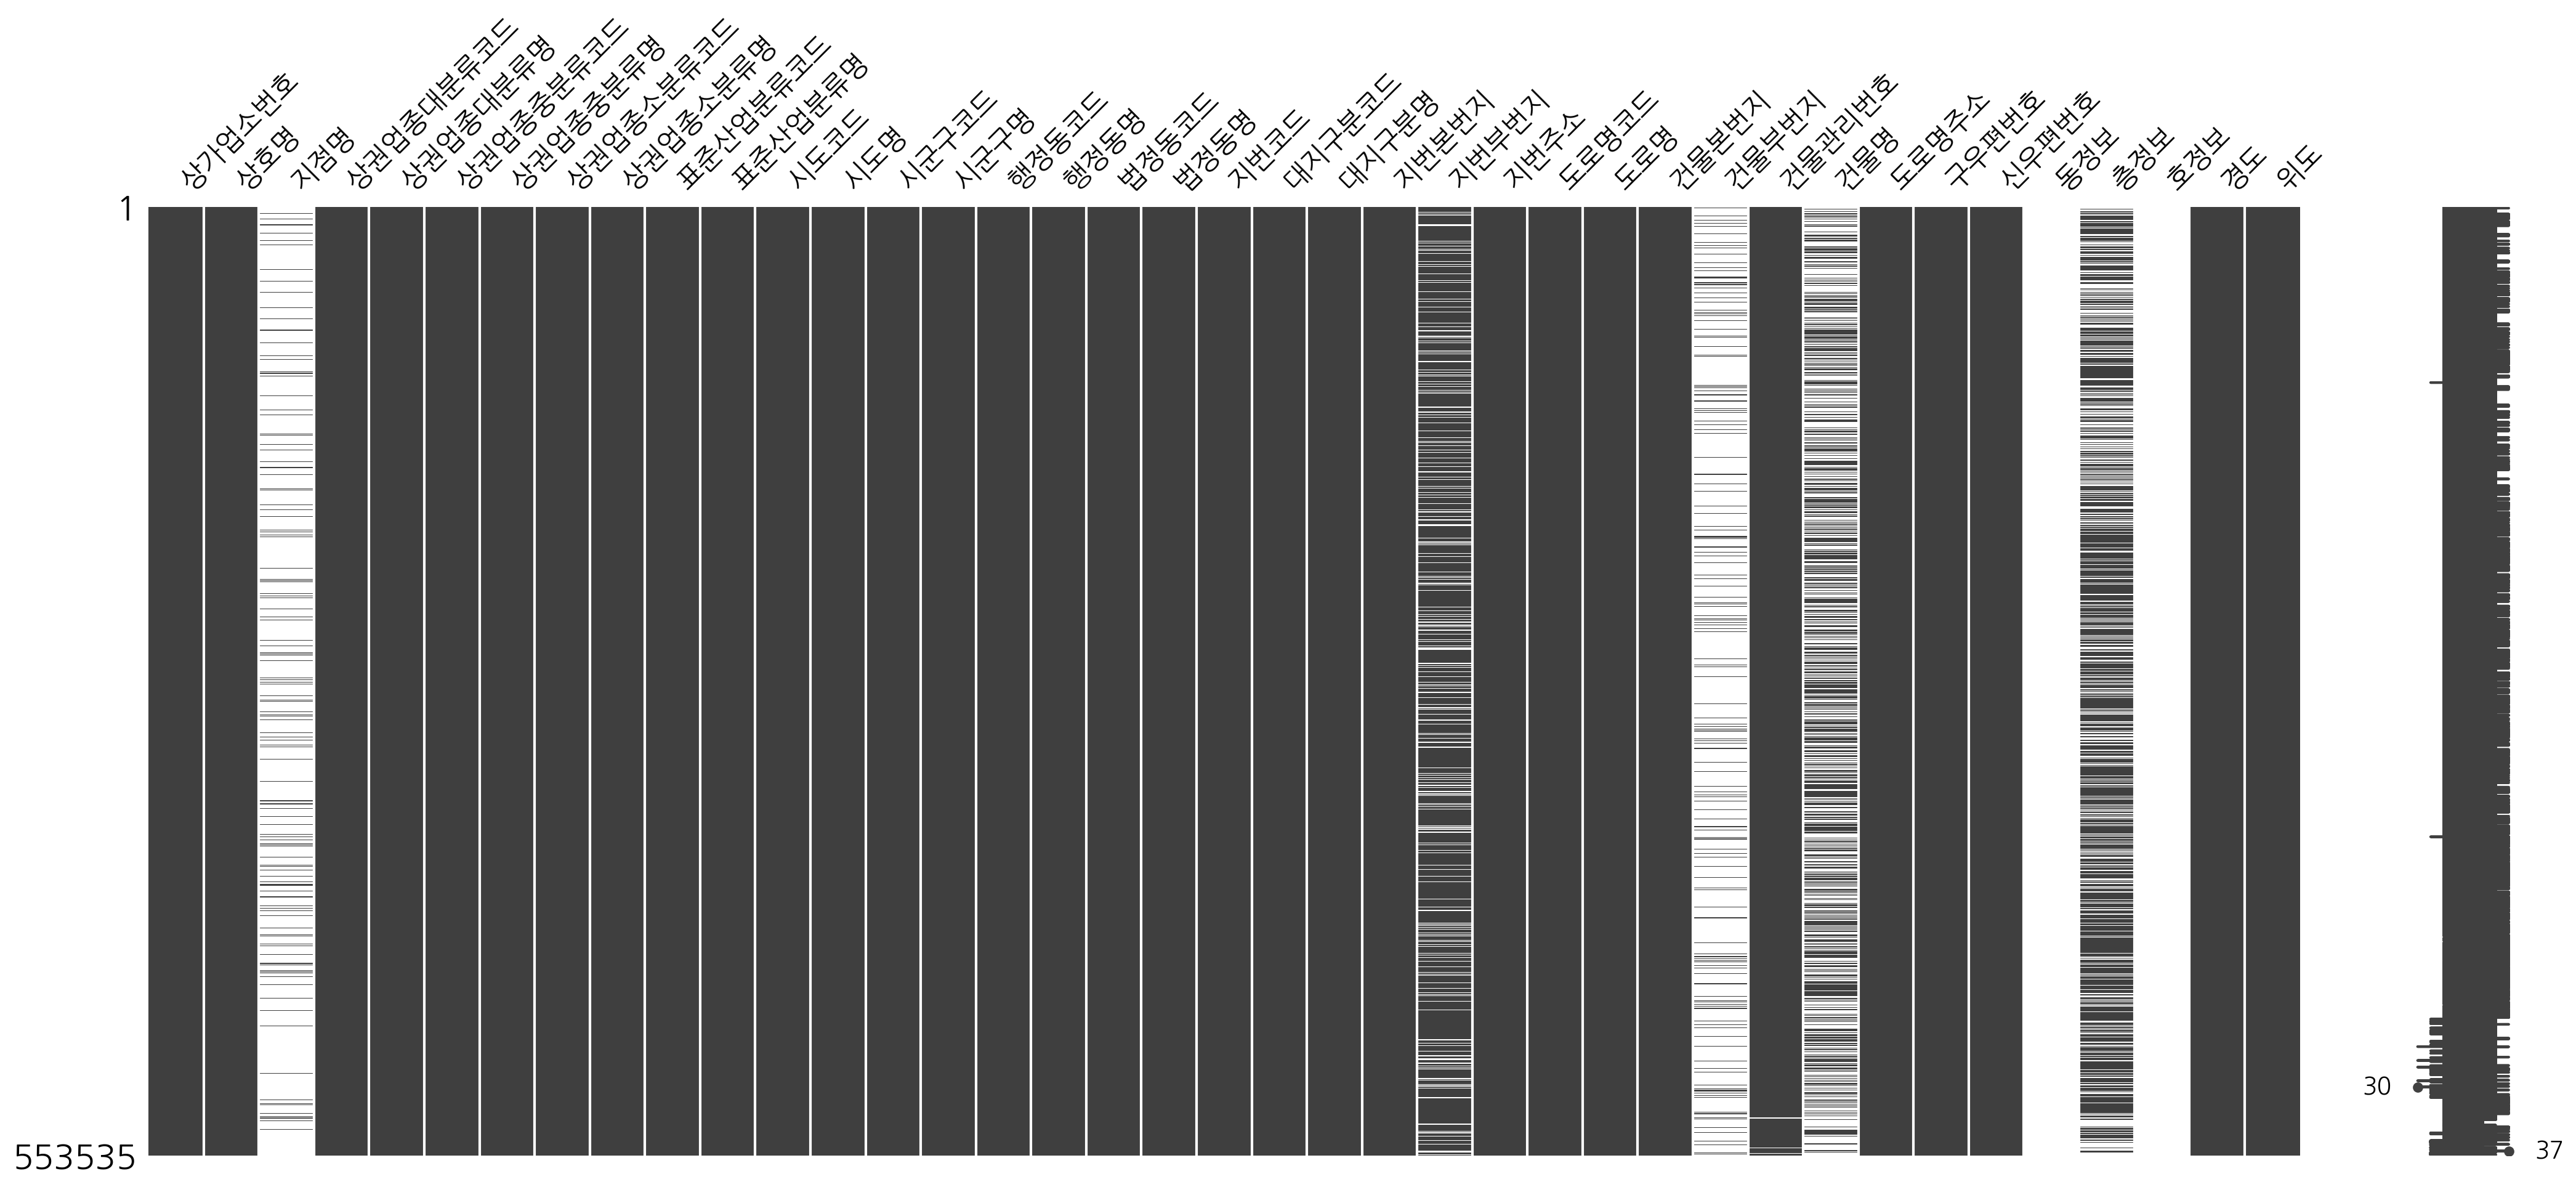

In [23]:
# 메트릭스형으로 df의 결측값 확인
mn.matrix(df)

<Axes: >

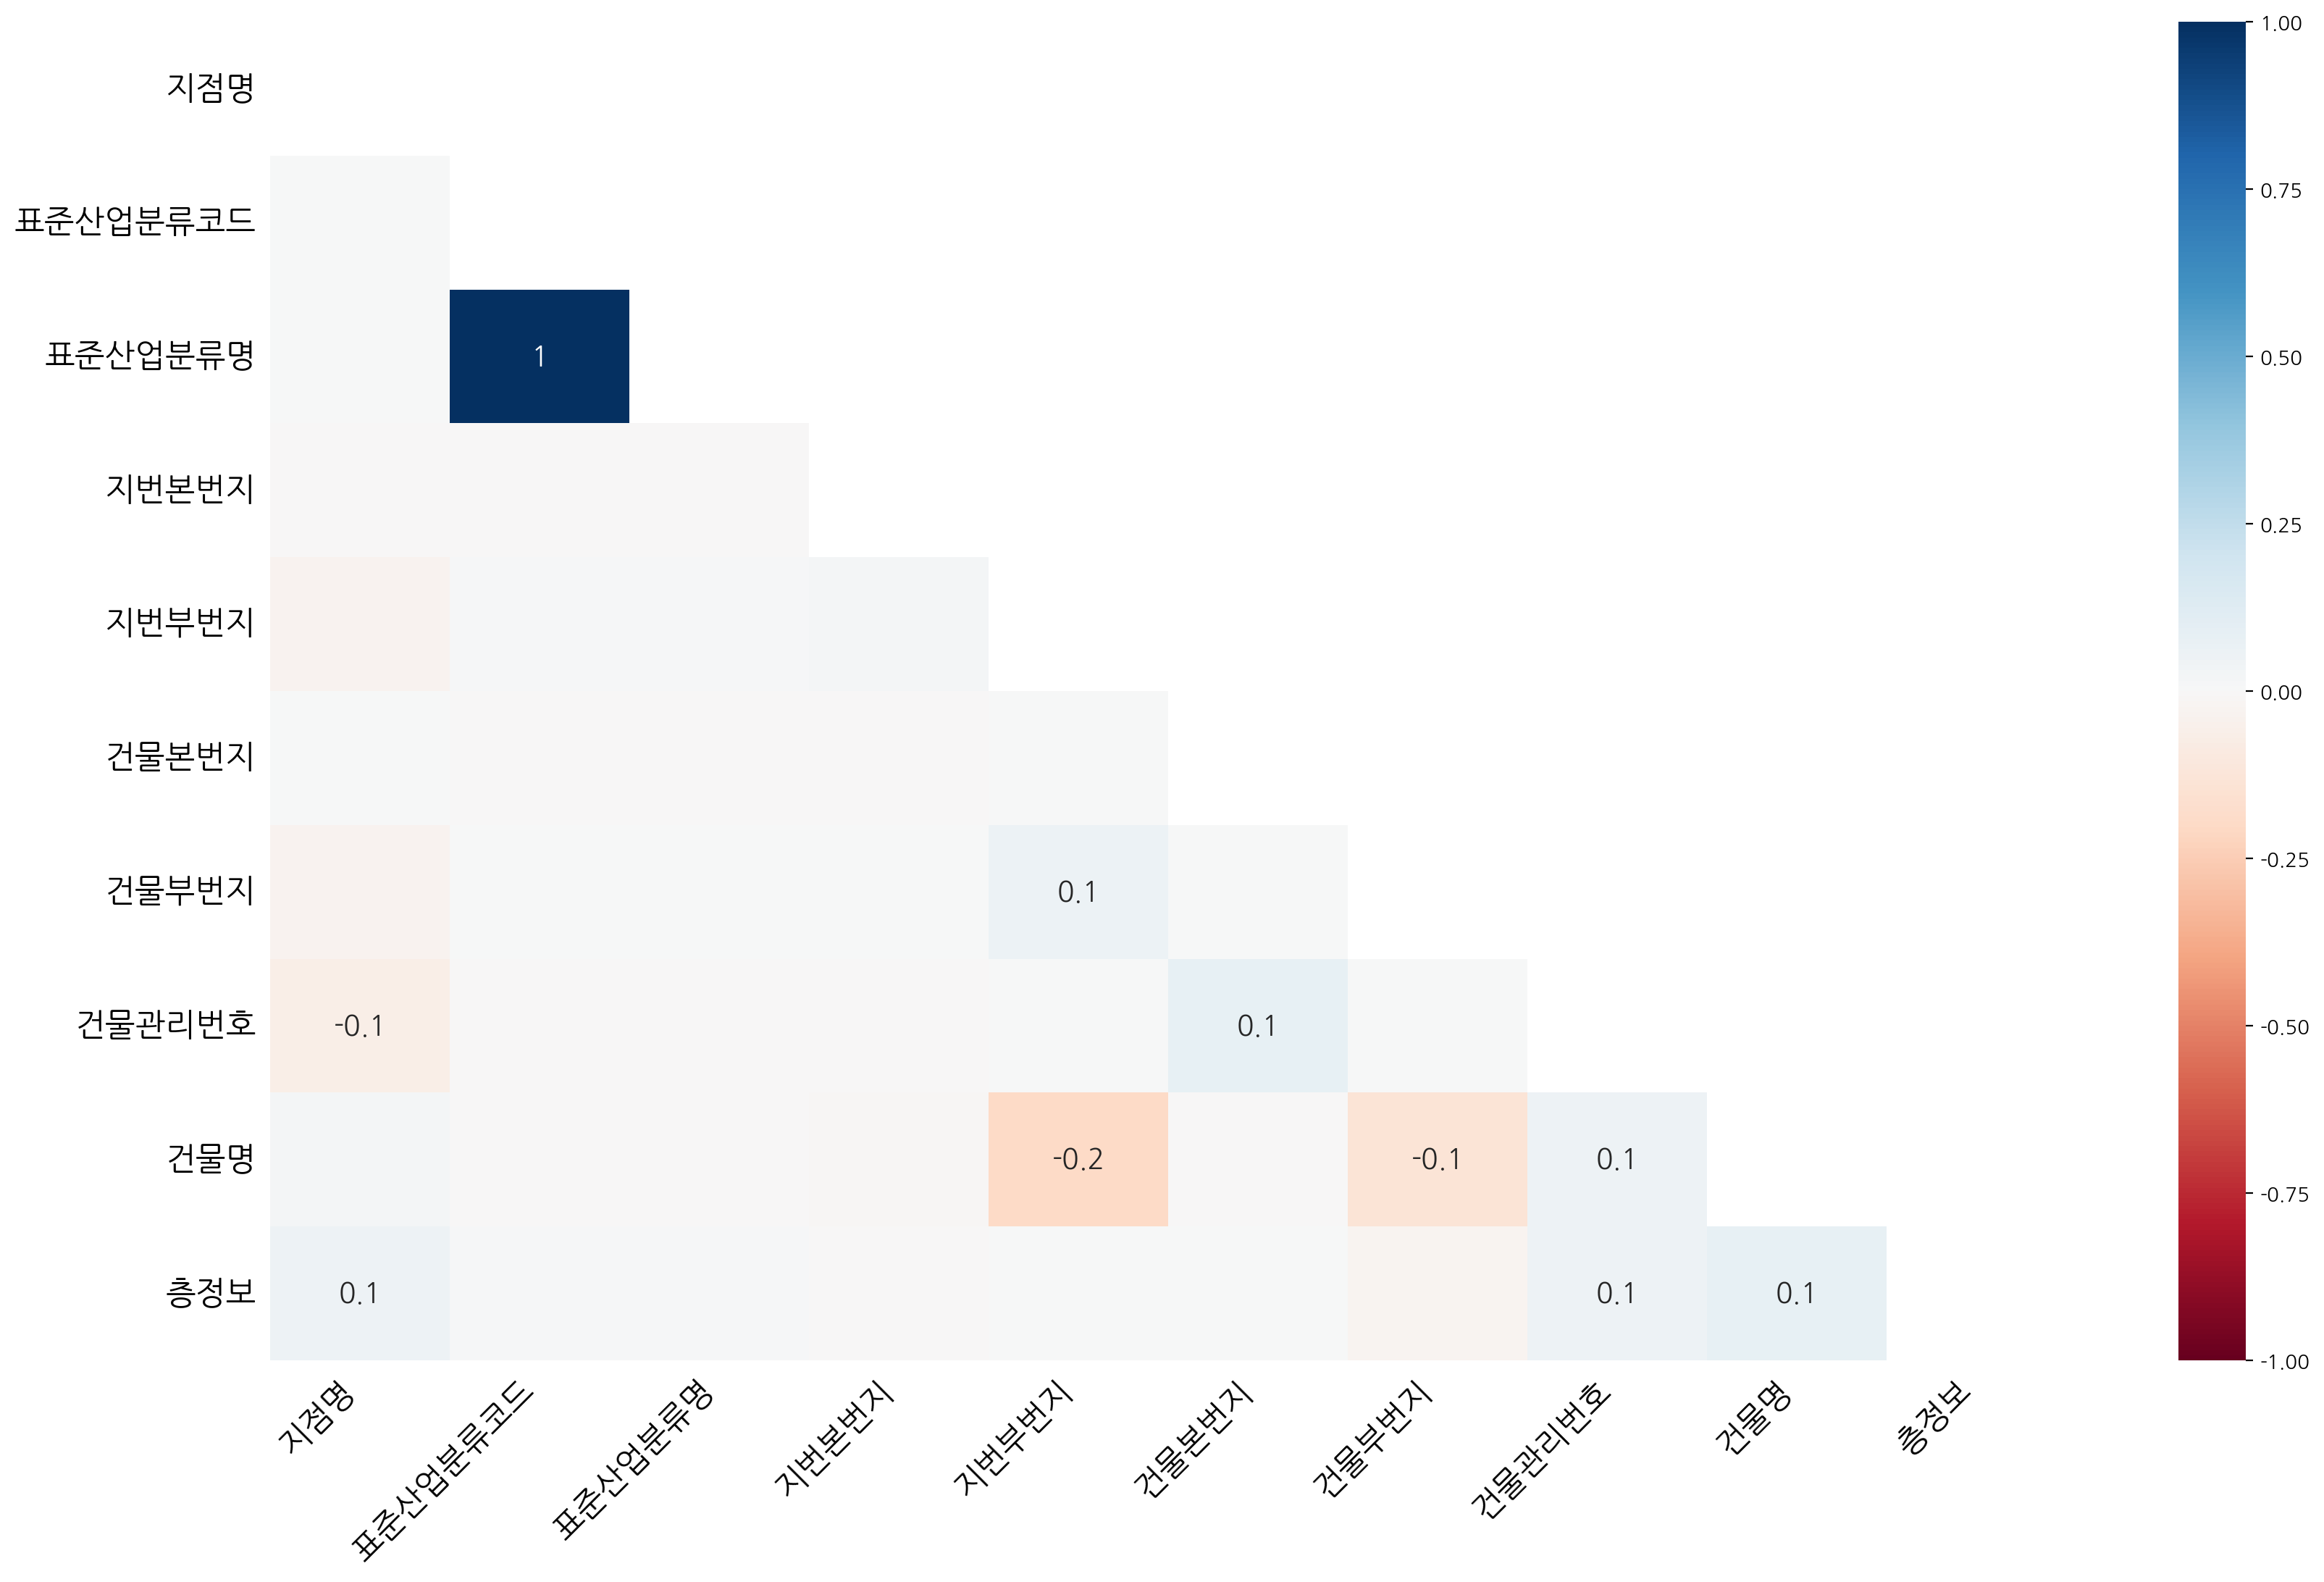

In [24]:
# heatmap으로 df의 결측값 확인
mn.heatmap(df)

<Axes: >

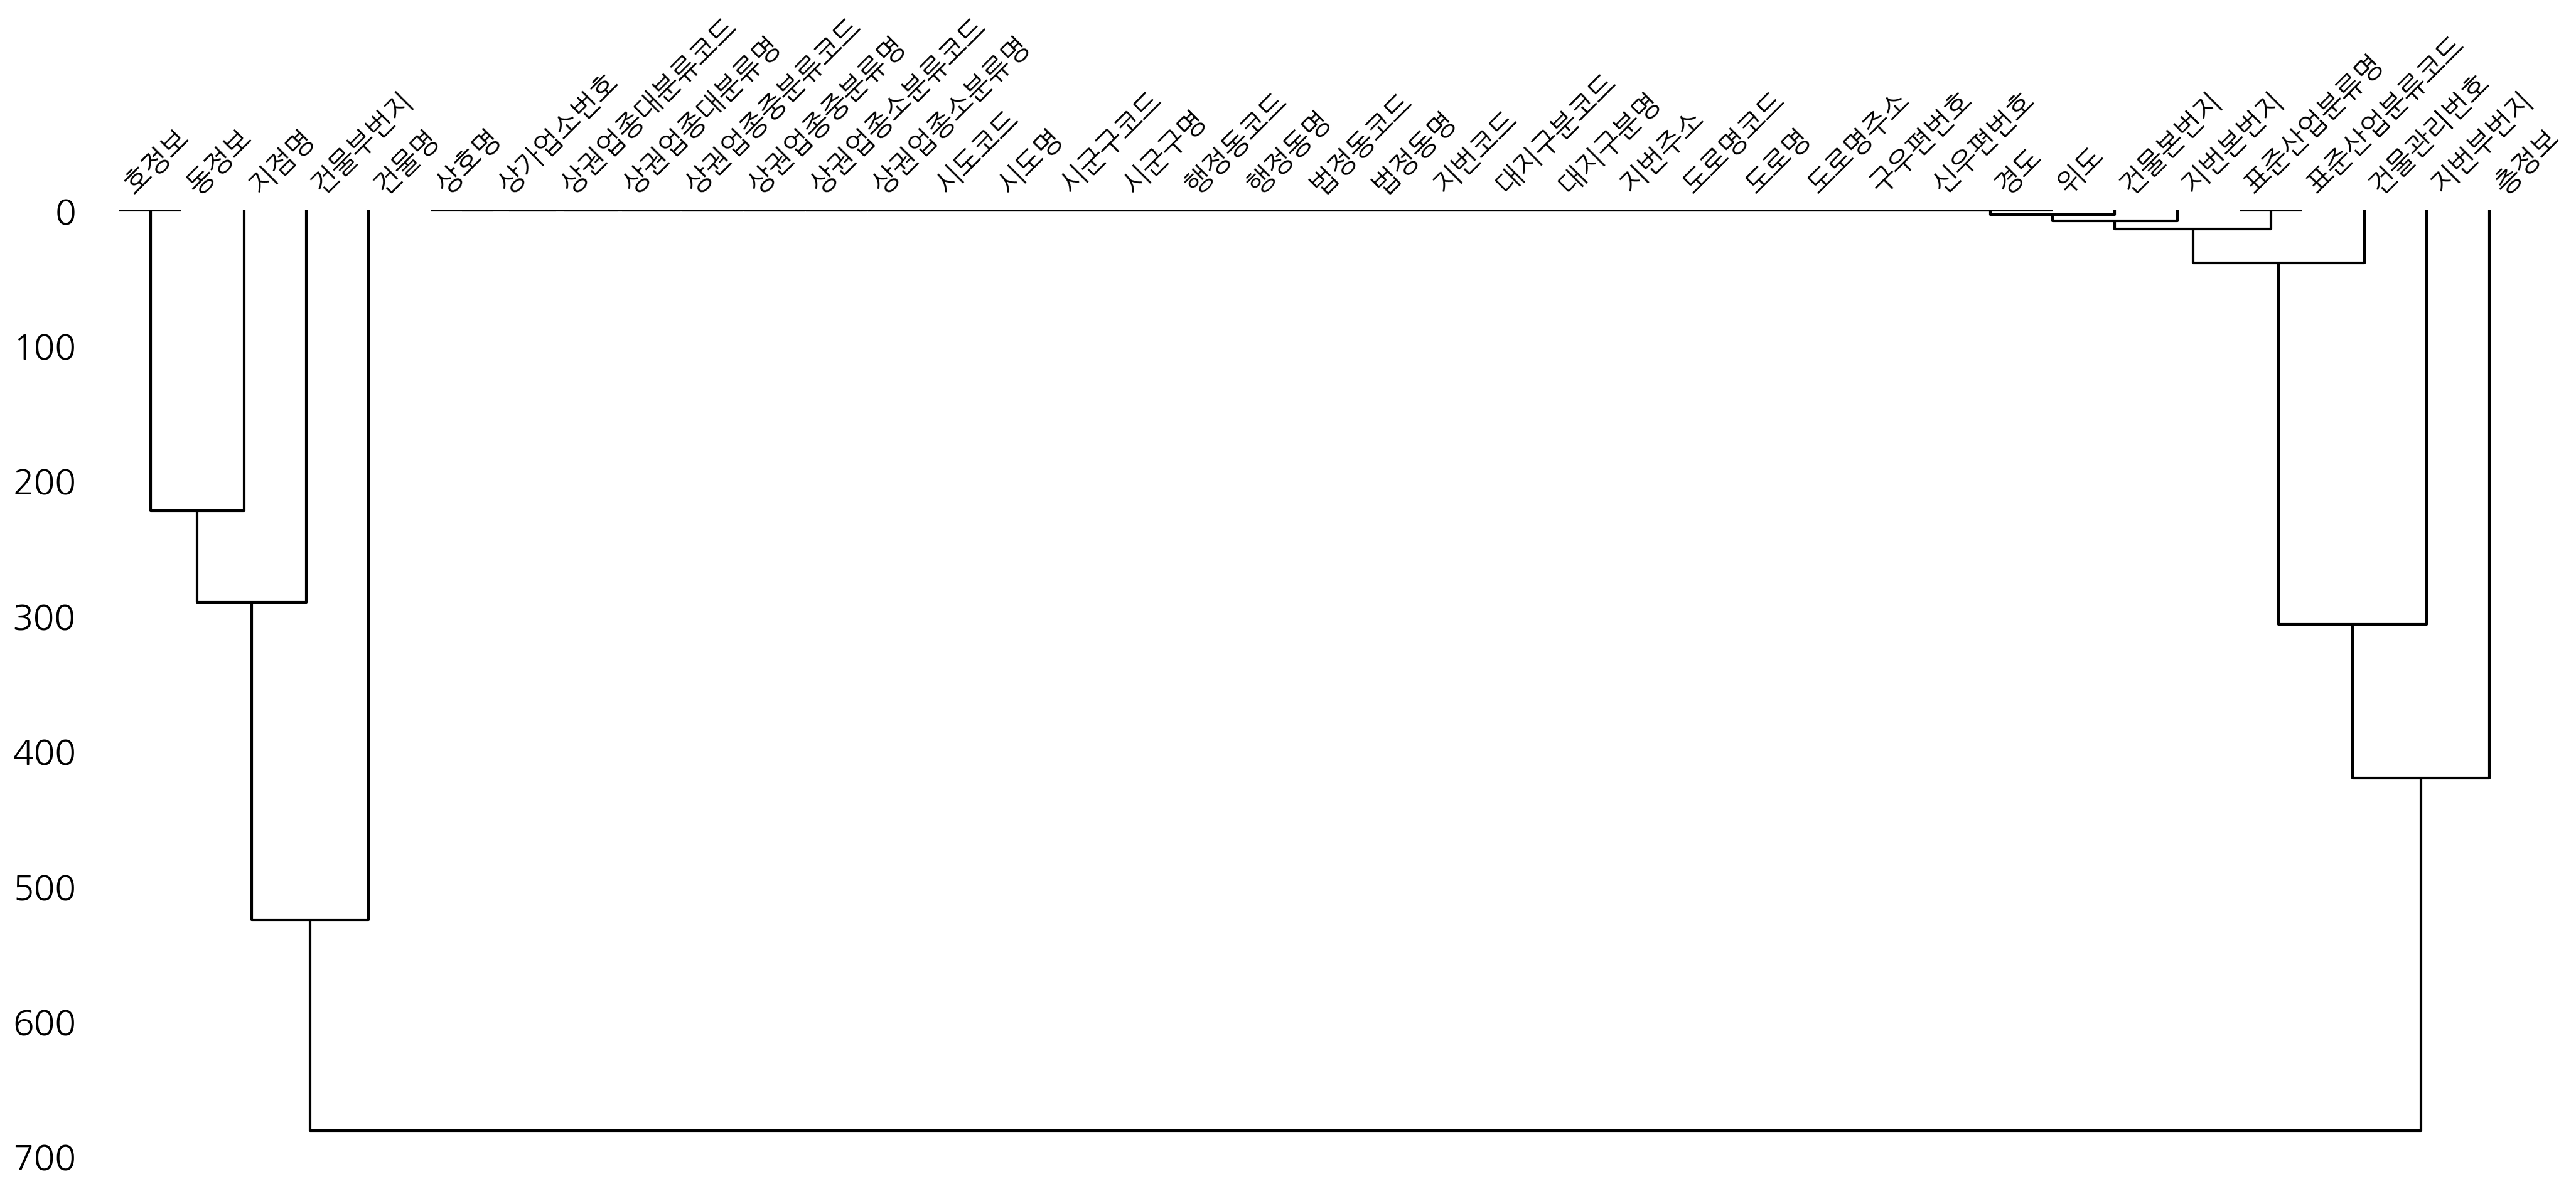

In [25]:
# dendogram으로 결측값 확인
mn.dendrogram(df)

In [26]:
# 데이터 확인
df.head()

# 삭제할 컬럼들
# 상가업소번호, 상권업종대분류코드, 상권업종중분류코드, 상권업종소분류코드, 
# 표준산업분류코드, 시도코드, 시군구코드, 행정동코드, 법정동코드, 
# 지번코드, 대지구분코드, 지번본번지, 지번부번지, 도로명코드, 건물본번지, 
# 건물부번지, 건물관리번호, 구우편번호, 신우편번호

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220700009628,홈처치스쿨,NaN,P1,교육,P107,교육 지원,P10799,기타 교육지원 서비스업,P85709,기타 교육지원 서비스업,11,서울특별시,11230,동대문구,11230750,이문2동,1123011000,이문동,1123011000102560217,1,대지,256.0,217.0,서울특별시 동대문구 이문동 256-217,112304115224,서울특별시 동대문구 신이문로8길,5.0,NaN,1123011000102560217000901,NaN,서울특별시 동대문구 신이문로8길 5,130827,2411,NaN,NaN,NaN,127.063553,37.602687
1,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,기타 비알코올 음료점업,11,서울특별시,11110,종로구,11110540,삼청동,1111014000,삼청동,1111014000100280021,1,대지,28.0,21.0,서울특별시 종로구 삼청동 28-21,111103100007,서울특별시 종로구 삼청로,122.0,1.0,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.981840,37.586250
2,MA010120220800000036,한국황토건축연구소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,부동산 중개 및 대리업,11,서울특별시,11650,서초구,11650531,서초4동,1165010800,서초동,1165010800113080025,1,대지,1308.0,25.0,서울특별시 서초구 서초동 1308-25,116504163432,서울특별시 서초구 서초대로73길,40.0,NaN,1165010800113080025020133,강남오피스텔,서울특별시 서초구 서초대로73길 40,137856,6612,NaN,11,NaN,127.024563,37.500924
3,MA010120220800000077,소망공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,부동산 중개 및 대리업,11,서울특별시,11200,성동구,11200790,용답동,1120012200,용답동,1120012200100040011,1,대지,4.0,11.0,서울특별시 성동구 용답동 4-11,112004109494,서울특별시 성동구 용답중앙15길,18.0,NaN,1120012200100040011000899,NaN,서울특별시 성동구 용답중앙15길 18,133847,4805,NaN,1,NaN,127.054262,37.564786
4,MA010120220800000084,고향집,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,한식 일반 음식점업,11,서울특별시,11110,종로구,11110615,종로1.2.3.4가동,1111015400,장사동,1111015400100800000,1,대지,80.0,NaN,서울특별시 종로구 장사동 80,111104100055,서울특별시 종로구 돈화문로4길,30.0,NaN,1111015400100800000000001,NaN,서울특별시 종로구 돈화문로4길 30,110430,3193,NaN,NaN,NaN,126.993820,37.570025


In [27]:
# 결측치가 너무 많거나, 데이터가 중복되는 컬럼 제거하기
# 해당 컬럼(열) 이름만 따로 저장하기
cols = df.columns
cols

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [28]:
# 안 쓸 컬럼(열) 이름만 저장하기
# 번호와 코드, 번지가 포함된 컬럼(열) ㅣ름만 가져와서 not_use_cols 에 저장하기
not_use_cols = cols[cols.str.contains('번호|코드|번지')]
not_use_cols

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '표준산업분류코드', '시도코드',
       '시군구코드', '행정동코드', '법정동코드', '지번코드', '대지구분코드', '지번본번지', '지번부번지', '도로명코드',
       '건물본번지', '건물부번지', '건물관리번호', '구우편번호', '신우편번호'],
      dtype='object')

In [29]:
# 삭제 전 데이터프레임 행, 열 현황
print(df.shape)

(553535, 39)


In [30]:
# not_use_cols 에 저장된 컬럼 삭제
# drop(삭제할 데이터, 삭제할 축)
df = df.drop(not_use_cols, axis = 1)
df

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물명,도로명주소,동정보,층정보,호정보,경도,위도
0,홈처치스쿨,NaN,교육,교육 지원,기타 교육지원 서비스업,기타 교육지원 서비스업,서울특별시,동대문구,이문2동,이문동,대지,서울특별시 동대문구 이문동 256-217,서울특별시 동대문구 신이문로8길,NaN,서울특별시 동대문구 신이문로8길 5,NaN,NaN,NaN,127.063553,37.602687
1,부동산임대김은숙,NaN,음식,비알코올,카페,기타 비알코올 음료점업,서울특별시,종로구,삼청동,삼청동,대지,서울특별시 종로구 삼청동 28-21,서울특별시 종로구 삼청로,NaN,서울특별시 종로구 삼청로 122-1,NaN,NaN,NaN,126.981840,37.586250
2,한국황토건축연구소,NaN,부동산,부동산 서비스,부동산 중개/대리업,부동산 중개 및 대리업,서울특별시,서초구,서초4동,서초동,대지,서울특별시 서초구 서초동 1308-25,서울특별시 서초구 서초대로73길,강남오피스텔,서울특별시 서초구 서초대로73길 40,NaN,11,NaN,127.024563,37.500924
3,소망공인중개사사무소,NaN,부동산,부동산 서비스,부동산 중개/대리업,부동산 중개 및 대리업,서울특별시,성동구,용답동,용답동,대지,서울특별시 성동구 용답동 4-11,서울특별시 성동구 용답중앙15길,NaN,서울특별시 성동구 용답중앙15길 18,NaN,1,NaN,127.054262,37.564786
4,고향집,NaN,음식,한식,백반/한정식,한식 일반 음식점업,서울특별시,종로구,종로1.2.3.4가동,장사동,대지,서울특별시 종로구 장사동 80,서울특별시 종로구 돈화문로4길,NaN,서울특별시 종로구 돈화문로4길 30,NaN,NaN,NaN,126.993820,37.570025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553530,환명상원,NaN,수리·개인,이용·미용,미용실,두발 미용업,서울특별시,종로구,혜화동,명륜1가,대지,서울특별시 종로구 명륜1가 75-1,서울특별시 종로구 성균관로,NaN,서울특별시 종로구 성균관로 44,NaN,NaN,NaN,126.996819,37.586603
553531,올리스푼,NaN,소매,기타 상품 소매,그 외 기타 상품 전문 소매업,그 외 기타 분류 안된 상품 전문 소매업,서울특별시,강서구,화곡4동,화곡동,대지,서울특별시 강서구 화곡동 789-19,서울특별시 강서구 곰달래로60가길,NaN,서울특별시 강서구 곰달래로60가길 46,NaN,NaN,NaN,126.860663,37.530082
553532,스튜디오익센트릭,NaN,과학·기술,전문 디자인,시각 디자인업,시각 디자인업,서울특별시,강남구,논현2동,논현동,대지,서울특별시 강남구 논현동 218-17,서울특별시 강남구 언주로121길,NaN,서울특별시 강남구 언주로121길 4-5,NaN,2,NaN,127.035007,37.512004
553533,두찜강남,논현점,음식,한식,백반/한정식,한식 일반 음식점업,서울특별시,강남구,논현2동,논현동,대지,서울특별시 강남구 논현동 218-17,서울특별시 강남구 언주로121길,NaN,서울특별시 강남구 언주로121길 4-5,NaN,1,NaN,127.035007,37.512004


In [31]:
# 삭제 후 데이터프레임 행, 열 현황
print(df.shape)

(553535, 20)


In [32]:
# 결측값이 많은 컬럼(열) 제거
not_use_cols2 = df.isnull().sum()
not_use_cols2

상호명              0
지점명         504116
상권업종대분류명         0
상권업종중분류명         0
상권업종소분류명         0
표준산업분류명        192
시도명              0
시군구명             0
행정동명             0
법정동명             0
대지구분명            0
지번주소             0
도로명              0
건물명         284203
도로명주소            0
동정보         553535
층정보         175429
호정보         553535
경도               0
위도               0
dtype: int64

In [33]:
# not_use_cols2 정렬하기
not_cols2 = not_use_cols2.sort_values().tail().index
not_cols2

Index(['층정보', '건물명', '지점명', '동정보', '호정보'], dtype='object')

In [34]:
print(df.shape)

(553535, 20)


In [35]:
df.drop(not_cols2, axis = 1,inplace = True)

In [36]:
df

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소,경도,위도
0,홈처치스쿨,교육,교육 지원,기타 교육지원 서비스업,기타 교육지원 서비스업,서울특별시,동대문구,이문2동,이문동,대지,서울특별시 동대문구 이문동 256-217,서울특별시 동대문구 신이문로8길,서울특별시 동대문구 신이문로8길 5,127.063553,37.602687
1,부동산임대김은숙,음식,비알코올,카페,기타 비알코올 음료점업,서울특별시,종로구,삼청동,삼청동,대지,서울특별시 종로구 삼청동 28-21,서울특별시 종로구 삼청로,서울특별시 종로구 삼청로 122-1,126.981840,37.586250
2,한국황토건축연구소,부동산,부동산 서비스,부동산 중개/대리업,부동산 중개 및 대리업,서울특별시,서초구,서초4동,서초동,대지,서울특별시 서초구 서초동 1308-25,서울특별시 서초구 서초대로73길,서울특별시 서초구 서초대로73길 40,127.024563,37.500924
3,소망공인중개사사무소,부동산,부동산 서비스,부동산 중개/대리업,부동산 중개 및 대리업,서울특별시,성동구,용답동,용답동,대지,서울특별시 성동구 용답동 4-11,서울특별시 성동구 용답중앙15길,서울특별시 성동구 용답중앙15길 18,127.054262,37.564786
4,고향집,음식,한식,백반/한정식,한식 일반 음식점업,서울특별시,종로구,종로1.2.3.4가동,장사동,대지,서울특별시 종로구 장사동 80,서울특별시 종로구 돈화문로4길,서울특별시 종로구 돈화문로4길 30,126.993820,37.570025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553530,환명상원,수리·개인,이용·미용,미용실,두발 미용업,서울특별시,종로구,혜화동,명륜1가,대지,서울특별시 종로구 명륜1가 75-1,서울특별시 종로구 성균관로,서울특별시 종로구 성균관로 44,126.996819,37.586603
553531,올리스푼,소매,기타 상품 소매,그 외 기타 상품 전문 소매업,그 외 기타 분류 안된 상품 전문 소매업,서울특별시,강서구,화곡4동,화곡동,대지,서울특별시 강서구 화곡동 789-19,서울특별시 강서구 곰달래로60가길,서울특별시 강서구 곰달래로60가길 46,126.860663,37.530082
553532,스튜디오익센트릭,과학·기술,전문 디자인,시각 디자인업,시각 디자인업,서울특별시,강남구,논현2동,논현동,대지,서울특별시 강남구 논현동 218-17,서울특별시 강남구 언주로121길,서울특별시 강남구 언주로121길 4-5,127.035007,37.512004
553533,두찜강남,음식,한식,백반/한정식,한식 일반 음식점업,서울특별시,강남구,논현2동,논현동,대지,서울특별시 강남구 논현동 218-17,서울특별시 강남구 언주로121길,서울특별시 강남구 언주로121길 4-5,127.035007,37.512004


In [37]:
print(df.shape)

(553535, 15)


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553535 entries, 0 to 553534
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       553535 non-null  object 
 1   상권업종대분류명  553535 non-null  object 
 2   상권업종중분류명  553535 non-null  object 
 3   상권업종소분류명  553535 non-null  object 
 4   표준산업분류명   553343 non-null  object 
 5   시도명       553535 non-null  object 
 6   시군구명      553535 non-null  object 
 7   행정동명      553535 non-null  object 
 8   법정동명      553535 non-null  object 
 9   대지구분명     553535 non-null  object 
 10  지번주소      553535 non-null  object 
 11  도로명       553535 non-null  object 
 12  도로명주소     553535 non-null  object 
 13  경도        553535 non-null  float64
 14  위도        553535 non-null  float64
dtypes: float64(2), object(13)
memory usage: 63.3+ MB


In [39]:
df.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소,경도,위도
0,홈처치스쿨,교육,교육 지원,기타 교육지원 서비스업,기타 교육지원 서비스업,서울특별시,동대문구,이문2동,이문동,대지,서울특별시 동대문구 이문동 256-217,서울특별시 동대문구 신이문로8길,서울특별시 동대문구 신이문로8길 5,127.063553,37.602687
1,부동산임대김은숙,음식,비알코올,카페,기타 비알코올 음료점업,서울특별시,종로구,삼청동,삼청동,대지,서울특별시 종로구 삼청동 28-21,서울특별시 종로구 삼청로,서울특별시 종로구 삼청로 122-1,126.981840,37.586250
2,한국황토건축연구소,부동산,부동산 서비스,부동산 중개/대리업,부동산 중개 및 대리업,서울특별시,서초구,서초4동,서초동,대지,서울특별시 서초구 서초동 1308-25,서울특별시 서초구 서초대로73길,서울특별시 서초구 서초대로73길 40,127.024563,37.500924
3,소망공인중개사사무소,부동산,부동산 서비스,부동산 중개/대리업,부동산 중개 및 대리업,서울특별시,성동구,용답동,용답동,대지,서울특별시 성동구 용답동 4-11,서울특별시 성동구 용답중앙15길,서울특별시 성동구 용답중앙15길 18,127.054262,37.564786
4,고향집,음식,한식,백반/한정식,한식 일반 음식점업,서울특별시,종로구,종로1.2.3.4가동,장사동,대지,서울특별시 종로구 장사동 80,서울특별시 종로구 돈화문로4길,서울특별시 종로구 돈화문로4길 30,126.993820,37.570025


In [40]:
df.describe

<bound method NDFrame.describe of                상호명 상권업종대분류명  상권업종중분류명          상권업종소분류명  \
0            홈처치스쿨       교육     교육 지원      기타 교육지원 서비스업   
1         부동산임대김은숙       음식     비알코올                 카페   
2        한국황토건축연구소      부동산   부동산 서비스        부동산 중개/대리업   
3       소망공인중개사사무소      부동산   부동산 서비스        부동산 중개/대리업   
4              고향집       음식        한식            백반/한정식   
...            ...      ...       ...               ...   
553530        환명상원    수리·개인     이용·미용               미용실   
553531        올리스푼       소매  기타 상품 소매  그 외 기타 상품 전문 소매업   
553532    스튜디오익센트릭    과학·기술    전문 디자인           시각 디자인업   
553533        두찜강남       음식        한식            백반/한정식   
553534        두찜강남       음식        한식            백반/한정식   

                       표준산업분류명    시도명  시군구명         행정동명  법정동명 대지구분명  \
0                 기타 교육지원 서비스업  서울특별시  동대문구         이문2동   이문동    대지   
1                 기타 비알코올 음료점업  서울특별시   종로구          삼청동   삼청동    대지   
2                 부동산 중개 및 대리업  서울특별시   서

In [41]:
df[df['상호명'] == 'CU']

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소,경도,위도
7249,CU,소매,종합 소매,편의점,체인화 편의점,서울특별시,강남구,삼성2동,삼성동,대지,서울특별시 강남구 삼성동 141-33,서울특별시 강남구 테헤란로,서울특별시 강남구 테헤란로 403,127.049514,37.505079
99014,CU,소매,종합 소매,편의점,체인화 편의점,서울특별시,노원구,공릉2동,공릉동,대지,서울특별시 노원구 공릉동 89-1,서울특별시 노원구 노원로1길,서울특별시 노원구 노원로1길 67,127.083640,37.620820
146213,CU,소매,종합 소매,편의점,체인화 편의점,서울특별시,강동구,명일1동,명일동,대지,서울특별시 강동구 명일동 312-35,서울특별시 강동구 고덕로38길,서울특별시 강동구 고덕로38길 47,127.142774,37.552450
179442,CU,소매,종합 소매,편의점,체인화 편의점,서울특별시,송파구,거여2동,거여동,대지,서울특별시 송파구 거여동 290-3,서울특별시 송파구 양산로4길,서울특별시 송파구 양산로4길 13,127.144724,37.489999
221660,CU,소매,종합 소매,편의점,체인화 편의점,서울특별시,구로구,구로3동,구로동,대지,서울특별시 구로구 구로동 1130-8,서울특별시 구로구 디지털로32다길,서울특별시 구로구 디지털로32다길 46,126.898878,37.481179
234792,CU,소매,종합 소매,편의점,체인화 편의점,서울특별시,노원구,월계1동,월계동,대지,서울특별시 노원구 월계동 447-1,서울특별시 노원구 광운로,서울특별시 노원구 광운로 20,127.058243,37.619322
334305,CU,소매,종합 소매,편의점,체인화 편의점,서울특별시,광진구,자양2동,자양동,대지,서울특별시 광진구 자양동 216-12,서울특별시 광진구 자양로,서울특별시 광진구 자양로 96,127.083953,37.536325


In [42]:
df[df['상호명'].str.contains('CU')]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소,경도,위도
7249,CU,소매,종합 소매,편의점,체인화 편의점,서울특별시,강남구,삼성2동,삼성동,대지,서울특별시 강남구 삼성동 141-33,서울특별시 강남구 테헤란로,서울특별시 강남구 테헤란로 403,127.049514,37.505079
12188,FOCUS엔지니어링,과학·기술,기술 서비스,기타 엔지니어링 서비스업,기타 엔지니어링 서비스업,서울특별시,마포구,서교동,서교동,대지,서울특별시 마포구 서교동 380-1,서울특별시 마포구 잔다리로7길,서울특별시 마포구 잔다리로7길 41,126.915598,37.553380
19315,CU한강로마루점,소매,종합 소매,편의점,체인화 편의점,서울특별시,용산구,한강로동,한강로2가,대지,서울특별시 용산구 한강로2가 112-3,서울특별시 용산구 한강대로44길,서울특별시 용산구 한강대로44길 16,126.970720,37.530710
19788,INCUEN,시설관리·임대,고용 알선,고용 알선업,고용 알선업,서울특별시,강남구,대치4동,대치동,대지,서울특별시 강남구 대치동 896-27,서울특별시 강남구 선릉로86길,서울특별시 강남구 선릉로86길 38,127.052770,37.503798
20293,CU용산한강로점,소매,종합 소매,편의점,체인화 편의점,서울특별시,용산구,한강로동,한강로2가,대지,서울특별시 용산구 한강로2가 2-11,서울특별시 용산구 한강대로43길,서울특별시 용산구 한강대로43길 13,126.969080,37.531539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547642,CU영등포태광점,소매,종합 소매,편의점,슈퍼마켓,서울특별시,영등포구,당산1동,당산동2가,대지,서울특별시 영등포구 당산동2가 162-7,서울특별시 영등포구 선유동1로,서울특별시 영등포구 선유동1로 28,126.892145,37.524484
551709,CU대치역점,소매,종합 소매,편의점,슈퍼마켓,서울특별시,강남구,삼성2동,삼성동,대지,서울특별시 강남구 삼성동 127-8,서울특별시 강남구 삼성로,서울특별시 강남구 삼성로 539,127.061643,37.496901
551891,CU논현,소매,종합 소매,편의점,슈퍼마켓,서울특별시,강남구,논현2동,논현동,대지,서울특별시 강남구 논현동 118,서울특별시 강남구 선릉로131길,서울특별시 강남구 선릉로131길 25,127.038923,37.517166
552186,CU뉴이태원경리단점,소매,종합 소매,편의점,슈퍼마켓,서울특별시,용산구,이태원2동,이태원동,대지,서울특별시 용산구 이태원동 557,서울특별시 용산구 녹사평대로,서울특별시 용산구 녹사평대로 222,126.987067,37.537345


In [43]:
df.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소,경도,위도
0,홈처치스쿨,교육,교육 지원,기타 교육지원 서비스업,기타 교육지원 서비스업,서울특별시,동대문구,이문2동,이문동,대지,서울특별시 동대문구 이문동 256-217,서울특별시 동대문구 신이문로8길,서울특별시 동대문구 신이문로8길 5,127.063553,37.602687
1,부동산임대김은숙,음식,비알코올,카페,기타 비알코올 음료점업,서울특별시,종로구,삼청동,삼청동,대지,서울특별시 종로구 삼청동 28-21,서울특별시 종로구 삼청로,서울특별시 종로구 삼청로 122-1,126.981840,37.586250
2,한국황토건축연구소,부동산,부동산 서비스,부동산 중개/대리업,부동산 중개 및 대리업,서울특별시,서초구,서초4동,서초동,대지,서울특별시 서초구 서초동 1308-25,서울특별시 서초구 서초대로73길,서울특별시 서초구 서초대로73길 40,127.024563,37.500924
3,소망공인중개사사무소,부동산,부동산 서비스,부동산 중개/대리업,부동산 중개 및 대리업,서울특별시,성동구,용답동,용답동,대지,서울특별시 성동구 용답동 4-11,서울특별시 성동구 용답중앙15길,서울특별시 성동구 용답중앙15길 18,127.054262,37.564786
4,고향집,음식,한식,백반/한정식,한식 일반 음식점업,서울특별시,종로구,종로1.2.3.4가동,장사동,대지,서울특별시 종로구 장사동 80,서울특별시 종로구 돈화문로4길,서울특별시 종로구 돈화문로4길 30,126.993820,37.570025


In [44]:
# 슬라이싱
# loc, iloc
# loc를 이용하여 0 행의 '상호명' 컬럼(열)에 있는 데이터만 출력

df.loc[0,'상호명']

'홈처치스쿨'

In [45]:
# iloc 를 이용하여 첫번째 행의, 첫번째 컬럼에 있는 데이터만 출력하세요
df.iloc[0,0]

'홈처치스쿨'

In [46]:
# iloc 를 이용하여 첫번째 행의, 2번째 컬럼에 있는 데이터만 출력하세요
df.iloc[0,1]

'교육'

In [47]:
# df 데이터의 상호명만 출력하도록 loc or iloc를 사용해서 프로그램 작성하세요
# loc는 : 뒤에 포함, 출력하려는 컬럼 또는 인덱스 이름을 적어주면 된다.
# iloc는 : 뒤에 미포함, 그렇기 때문에 +1 해줘야함.
print(df.iloc[:,0],'\n\n\n\n')
print(df.loc[:,'상호명'])

0              홈처치스쿨
1           부동산임대김은숙
2          한국황토건축연구소
3         소망공인중개사사무소
4                고향집
             ...    
553530          환명상원
553531          올리스푼
553532      스튜디오익센트릭
553533          두찜강남
553534          두찜강남
Name: 상호명, Length: 553535, dtype: object 




0              홈처치스쿨
1           부동산임대김은숙
2          한국황토건축연구소
3         소망공인중개사사무소
4                고향집
             ...    
553530          환명상원
553531          올리스푼
553532      스튜디오익센트릭
553533          두찜강남
553534          두찜강남
Name: 상호명, Length: 553535, dtype: object


In [48]:
# df 데이터의 상호명과 도로명주소 컬럼을 출력하세요
# 비연속적인 2개 이상의 데이터를 가져올 땐 대괄호 [] 로 묶어주기
df.loc[:,['상호명','도로명주소']]

,상호명,도로명주소
0,홈처치스쿨,서울특별시 동대문구 신이문로8길 5
1,부동산임대김은숙,서울특별시 종로구 삼청로 122-1
2,한국황토건축연구소,서울특별시 서초구 서초대로73길 40
3,소망공인중개사사무소,서울특별시 성동구 용답중앙15길 18
4,고향집,서울특별시 종로구 돈화문로4길 30
...,...,...
553530,환명상원,서울특별시 종로구 성균관로 44
553531,올리스푼,서울특별시 강서구 곰달래로60가길 46
553532,스튜디오익센트릭,서울특별시 강남구 언주로121길 4-5
553533,두찜강남,서울특별시 강남구 언주로121길 4-5


In [49]:
df.iloc[:,[0,12]]

,상호명,도로명주소
0,홈처치스쿨,서울특별시 동대문구 신이문로8길 5
1,부동산임대김은숙,서울특별시 종로구 삼청로 122-1
2,한국황토건축연구소,서울특별시 서초구 서초대로73길 40
3,소망공인중개사사무소,서울특별시 성동구 용답중앙15길 18
4,고향집,서울특별시 종로구 돈화문로4길 30
...,...,...
553530,환명상원,서울특별시 종로구 성균관로 44
553531,올리스푼,서울특별시 강서구 곰달래로60가길 46
553532,스튜디오익센트릭,서울특별시 강남구 언주로121길 4-5
553533,두찜강남,서울특별시 강남구 언주로121길 4-5


In [50]:
df.iloc[-5:,-5:]

,지번주소,도로명,도로명주소,경도,위도
553530,서울특별시 종로구 명륜1가 75-1,서울특별시 종로구 성균관로,서울특별시 종로구 성균관로 44,126.996819,37.586603
553531,서울특별시 강서구 화곡동 789-19,서울특별시 강서구 곰달래로60가길,서울특별시 강서구 곰달래로60가길 46,126.860663,37.530082
553532,서울특별시 강남구 논현동 218-17,서울특별시 강남구 언주로121길,서울특별시 강남구 언주로121길 4-5,127.035007,37.512004
553533,서울특별시 강남구 논현동 218-17,서울특별시 강남구 언주로121길,서울특별시 강남구 언주로121길 4-5,127.035007,37.512004
553534,서울특별시 강남구 논현동 219-33,서울특별시 강남구 언주로121길,서울특별시 강남구 언주로121길 10,127.034769,37.511608


In [51]:
df.loc[553530:,'지번주소' :]

,지번주소,도로명,도로명주소,경도,위도
553530,서울특별시 종로구 명륜1가 75-1,서울특별시 종로구 성균관로,서울특별시 종로구 성균관로 44,126.996819,37.586603
553531,서울특별시 강서구 화곡동 789-19,서울특별시 강서구 곰달래로60가길,서울특별시 강서구 곰달래로60가길 46,126.860663,37.530082
553532,서울특별시 강남구 논현동 218-17,서울특별시 강남구 언주로121길,서울특별시 강남구 언주로121길 4-5,127.035007,37.512004
553533,서울특별시 강남구 논현동 218-17,서울특별시 강남구 언주로121길,서울특별시 강남구 언주로121길 4-5,127.035007,37.512004
553534,서울특별시 강남구 논현동 219-33,서울특별시 강남구 언주로121길,서울특별시 강남구 언주로121길 10,127.034769,37.511608


# Day0404

In [52]:
df.shape

(553535, 15)

In [53]:
# 데이터 통계 확인하기
# default 값  -> 숫자형
df.describe()

,경도,위도
count,553535.000000,553535.000000
mean,126.992879,37.540709
std,0.082428,0.047772
min,126.768186,37.430456
25%,126.922384,37.501734
50%,127.009781,37.536627
75%,127.052584,37.568644
max,127.182653,37.692604


In [54]:
# 문자형 데이터 통계 확인하기
# include 사용해서 자료형 지정해주기
df.describe(include = 'object')

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,553535,553535,553535,553535,553343,553535,553535,553535,553535,553535,553535,553535,553535
unique,432889,10,75,247,371,1,25,425,464,2,157806,12740,159470
top,스타벅스,음식,한식,백반/한정식,한식 일반 음식점업,서울특별시,강남구,역삼1동,서초동,대지,서울특별시 송파구 문정동 634,서울특별시 강남구 테헤란로,서울특별시 송파구 충민로 66
freq,601,144885,52733,26049,39485,553535,65986,13890,18432,553116,955,4469,1220


In [55]:
df.describe(include = 'all')

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소,경도,위도
count,553535,553535,553535,553535,553343,553535,553535,553535,553535,553535,553535,553535,553535,553535.000000,553535.000000
unique,432889,10,75,247,371,1,25,425,464,2,157806,12740,159470,NaN,NaN
top,스타벅스,음식,한식,백반/한정식,한식 일반 음식점업,서울특별시,강남구,역삼1동,서초동,대지,서울특별시 송파구 문정동 634,서울특별시 강남구 테헤란로,서울특별시 송파구 충민로 66,NaN,NaN
freq,601,144885,52733,26049,39485,553535,65986,13890,18432,553116,955,4469,1220,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.992879,37.540709
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.082428,0.047772
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.768186,37.430456
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.922384,37.501734
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.009781,37.536627
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.052584,37.568644


In [56]:
df['상권업종대분류명'].unique()

array(['교육', '음식', '부동산', '소매', '수리·개인', '과학·기술', '시설관리·임대', '예술·스포츠',
       '숙박', '보건의료'], dtype=object)

In [57]:
len(df['상권업종대분류명'].unique())

10

In [58]:
df['상권업종대분류명'].nunique()

10

In [59]:
# 가장 많이 나온 값 = 최빈값
df['상권업종대분류명'].mode()

0    음식
Name: 상권업종대분류명, dtype: object

In [60]:
df['상호명'].mode()

0    스타벅스
Name: 상호명, dtype: object

count 결측치를 제외한 (NaN이 아닌) 값의 갯수를 계산
min, max 최솟값, 최댓값
idxmin, idxmax 최솟값, 최댓값의 인덱스 반환
quantile 특정 사분위수에 해당하는 값을 반환 (0~1 사이)
0.25 : 1사분위 수
0.5 : 2사분위수 (quantile 의 기본 값)
0.75 : 3사분위수
sum 수치 데이터의 합계
mean 평균
median 중앙값(중간값:데이터를 한 줄로 세웠을 때 가운데 위치하는 값, 중앙값이 짝수일 때는 가운데 2개 값의 평균을 구함)
mad 평균값으로부터의 절대 편차(absolute deviation)의 평균
std, var 표준편차, 분산을 계산
cumsum 맨 첫 번째 성분부터 각 성분까지의 누적합을 계산 (0 번째 부터 계속 더해짐)
cumprod 맨 첫번째 성분부터 각 성분까지의 누적곱을 계산 (1 번째 부터 계속 곱해짐)

In [61]:
# 경도의 최대값의 인덱스값 반환
df['경도'].idxmax()

330497

In [62]:
# 위도의 분산값
df['위도'].var()

0.002282192747933825

In [63]:
# 위도 분산값에 제곱근(루트)를 씌우면?
np.sqrt(df['위도'].var())

0.04777230105337009

In [64]:
# 위도의 표준편차값 계산
df['위도'].std()

0.04777230105337009

In [65]:
# 상권업종대분류명이 '음식'인 데이터만 저장
df_food = df[df['상권업종대분류명'] == '음식'].copy()
df_food

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소,경도,위도
1,부동산임대김은숙,음식,비알코올,카페,기타 비알코올 음료점업,서울특별시,종로구,삼청동,삼청동,대지,서울특별시 종로구 삼청동 28-21,서울특별시 종로구 삼청로,서울특별시 종로구 삼청로 122-1,126.981840,37.586250
4,고향집,음식,한식,백반/한정식,한식 일반 음식점업,서울특별시,종로구,종로1.2.3.4가동,장사동,대지,서울특별시 종로구 장사동 80,서울특별시 종로구 돈화문로4길,서울특별시 종로구 돈화문로4길 30,126.993820,37.570025
24,한옥,음식,비알코올,카페,기타 비알코올 음료점업,서울특별시,종로구,종로1.2.3.4가동,관훈동,대지,서울특별시 종로구 관훈동 64,서울특별시 종로구 인사동12길,서울특별시 종로구 인사동12길 9,126.984797,37.574601
26,양모리양대창,음식,한식,곱창 전골/구이,한식 일반 음식점업,서울특별시,서초구,방배4동,방배동,대지,서울특별시 서초구 방배동 851-6,서울특별시 서초구 방배로,서울특별시 서초구 방배로 174,126.993057,37.489178
27,우미관,음식,한식,백반/한정식,한식 일반 음식점업,서울특별시,종로구,종로1.2.3.4가동,관철동,대지,서울특별시 종로구 관철동 15-1,서울특별시 종로구 종로14길,서울특별시 종로구 종로14길 4,126.986711,37.569826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553509,마룬브레드,음식,기타 간이,빵/도넛,제과점업,서울특별시,강남구,역삼1동,역삼동,대지,서울특별시 강남구 역삼동 825-20,서울특별시 강남구 테헤란로4길,서울특별시 강남구 테헤란로4길 6,127.029289,37.497662
553523,하이디라오명동지점,음식,한식,백반/한정식,한식 일반 음식점업,서울특별시,중구,명동,을지로2가,대지,서울특별시 중구 을지로2가 199-13,서울특별시 중구 명동3길,서울특별시 중구 명동3길 36,126.983735,37.565347
553529,바리스파티움,음식,비알코올,카페,커피 전문점,서울특별시,송파구,잠실3동,잠실동,대지,서울특별시 송파구 잠실동 35,서울특별시 송파구 잠실로,서울특별시 송파구 잠실로 62,127.090289,37.508019
553533,두찜강남,음식,한식,백반/한정식,한식 일반 음식점업,서울특별시,강남구,논현2동,논현동,대지,서울특별시 강남구 논현동 218-17,서울특별시 강남구 언주로121길,서울특별시 강남구 언주로121길 4-5,127.035007,37.512004


In [66]:
# df['컬럼명'] -> 해당 컬럼만 가져옴
df['상권업종대분류명']

0            교육
1            음식
2           부동산
3           부동산
4            음식
          ...  
553530    수리·개인
553531       소매
553532    과학·기술
553533       음식
553534       음식
Name: 상권업종대분류명, Length: 553535, dtype: object

In [67]:
# 상권업종대분류명이 음식이면서 시군구명이 강남구인 데이터 가져오기
# 데이터명[조건] 인 경우에는 컬럼이 아니라 조건에 해당하는 데이터(인덱스)가 슬라이싱 됨(출력)
df[(df['시군구명'] == '강남구') & (df['상권업종대분류명'] == '음식')]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소,경도,위도
577,다미,음식,기타 간이,김밥/만두/분식,김밥 및 기타 간이 음식점업,서울특별시,강남구,삼성2동,삼성동,대지,서울특별시 강남구 삼성동 10-20,서울특별시 강남구 선릉로126길,서울특별시 강남구 선릉로126길 16,127.043458,37.515317
1951,담다,음식,비알코올,카페,기타 비알코올 음료점업,서울특별시,강남구,삼성2동,삼성동,대지,서울특별시 강남구 삼성동 140-11,서울특별시 강남구 선릉로100길,서울특별시 강남구 선릉로100길 24,127.049085,37.506809
2153,국보전,음식,한식,백반/한정식,한식 일반 음식점업,서울특별시,강남구,삼성1동,삼성동,대지,서울특별시 강남구 삼성동 152-16,서울특별시 강남구 테헤란로81길,서울특별시 강남구 테헤란로81길 60,127.055908,37.510410
3983,에머이,음식,동남아시아,베트남식 전문,기타 외국식 음식점업,서울특별시,강남구,대치4동,대치동,대지,서울특별시 강남구 대치동 936-11,서울특별시 강남구 선릉로64길,서울특별시 강남구 선릉로64길 14,127.053546,37.497806
3990,좋은자리,음식,주점,요리 주점,기타 주점업,서울특별시,강남구,신사동,신사동,대지,서울특별시 강남구 신사동 540-19,서울특별시 강남구 강남대로152길,서울특별시 강남구 강남대로152길 67,127.024524,37.518999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553452,피자알볼로대치,음식,기타 간이,피자,피자; 햄버거; 샌드위치 및 유사 음식점업,서울특별시,강남구,대치4동,대치동,대지,서울특별시 강남구 대치동 909-5,서울특별시 강남구 역삼로,서울특별시 강남구 역삼로 426,127.053639,37.501293
553475,전주한옥찜닭,음식,한식,닭/오리고기 구이/찜,한식 일반 음식점업,서울특별시,강남구,역삼1동,역삼동,대지,서울특별시 강남구 역삼동 673-36,서울특별시 강남구 테헤란로37길,서울특별시 강남구 테헤란로37길 27,127.040115,37.504029
553509,마룬브레드,음식,기타 간이,빵/도넛,제과점업,서울특별시,강남구,역삼1동,역삼동,대지,서울특별시 강남구 역삼동 825-20,서울특별시 강남구 테헤란로4길,서울특별시 강남구 테헤란로4길 6,127.029289,37.497662
553533,두찜강남,음식,한식,백반/한정식,한식 일반 음식점업,서울특별시,강남구,논현2동,논현동,대지,서울특별시 강남구 논현동 218-17,서울특별시 강남구 언주로121길,서울특별시 강남구 언주로121길 4-5,127.035007,37.512004


In [68]:
# df.loc[행, 열]
# df.loc[행][열]
df.loc[(df['시군구명'] == '강남구') & (df['상권업종대분류명'] == '음식')]['법정동명']

577       삼성동
1951      삼성동
2153      삼성동
3983      대치동
3990      신사동
         ... 
553452    대치동
553475    역삼동
553509    역삼동
553533    논현동
553534    논현동
Name: 법정동명, Length: 13057, dtype: object

In [69]:
# 강남구에 있는 음식점들의 법정동명별로 빈도수 확인하기
# 빈도수 value_counts()의 기본 정렬은 내림차순 (큰 숫자에서 -> 작은 숫자로)
df.loc[(df['시군구명'] == '강남구') & (df['상권업종대분류명'] == '음식')]['법정동명'].value_counts()

법정동명
역삼동     3451
논현동     2116
신사동     2008
대치동     1479
삼성동     1333
청담동      864
도곡동      552
개포동      446
일원동      249
수서동      223
압구정동     118
자곡동       99
세곡동       88
율현동       31
Name: count, dtype: int64

In [70]:
# loc[행,열]
# loc[행][열]

df.loc[(df['시군구명'] == '강남구') & (df['상권업종대분류명'] == '음식'),'법정동명'].value_counts()

법정동명
역삼동     3451
논현동     2116
신사동     2008
대치동     1479
삼성동     1333
청담동      864
도곡동      552
개포동      446
일원동      249
수서동      223
압구정동     118
자곡동       99
세곡동       88
율현동       31
Name: count, dtype: int64

In [71]:
# 상권업종대분류명이 음식인 데이터 중 상권업종중분류명의 유일값 출력하기
df[df['상권업종대분류명'] == '음식']['상권업종중분류명'].unique()
print(df.loc[df['상권업종대분류명'] == '음식','상권업종중분류명'].unique())

['비알코올 ' '한식' '기타 간이' '주점' '중식' '서양식' '일식' '동남아시아' '구내식당·뷔페' '기타 외국']


In [72]:
# 상권업종대분류명이 음식인 데이터의 상권업종중분류명의 빈도수 구하기
# 빈도수의 정렬 기준은 내림차순
df[df['상권업종대분류명'] == '음식']['상권업종중분류명'].value_counts()

상권업종중분류명
한식         52733
기타 간이      28822
비알코올       23341
주점         17614
일식          7112
서양식         6758
중식          5574
동남아시아       1780
구내식당·뷔페     1110
기타 외국         41
Name: count, dtype: int64

In [73]:
# 데이터는 띄어쓰기도 데이터에 포함됨
# unique() 를 이용해서 데이터 값 확인 필요
df[df['상권업종중분류명'] =='비알코올 ']

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소,경도,위도
1,부동산임대김은숙,음식,비알코올,카페,기타 비알코올 음료점업,서울특별시,종로구,삼청동,삼청동,대지,서울특별시 종로구 삼청동 28-21,서울특별시 종로구 삼청로,서울특별시 종로구 삼청로 122-1,126.981840,37.586250
24,한옥,음식,비알코올,카페,기타 비알코올 음료점업,서울특별시,종로구,종로1.2.3.4가동,관훈동,대지,서울특별시 종로구 관훈동 64,서울특별시 종로구 인사동12길,서울특별시 종로구 인사동12길 9,126.984797,37.574601
55,상록,음식,비알코올,카페,기타 비알코올 음료점업,서울특별시,종로구,종로1.2.3.4가동,낙원동,대지,서울특별시 종로구 낙원동 236-1,서울특별시 종로구 종로17길,서울특별시 종로구 종로17길 52,126.988556,37.572430
86,우궁옛날전통찻집,음식,비알코올,카페,기타 비알코올 음료점업,서울특별시,종로구,종로1.2.3.4가동,인사동,대지,서울특별시 종로구 인사동 10,서울특별시 종로구 인사동4길,서울특별시 종로구 인사동4길 9,126.986654,37.573231
105,화동커피,음식,비알코올,카페,커피 전문점,서울특별시,종로구,삼청동,화동,대지,서울특별시 종로구 화동 138-21,서울특별시 종로구 율곡로3길,서울특별시 종로구 율곡로3길 82,126.982271,37.579313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553300,주희스커피,음식,비알코올,카페,한식 일반 음식점업,서울특별시,서대문구,홍제2동,홍제동,대지,서울특별시 서대문구 홍제동 139-45,서울특별시 서대문구 통일로,서울특별시 서대문구 통일로 414,126.947058,37.586483
553394,인듀어런스커피,음식,비알코올,카페,한식 일반 음식점업,서울특별시,강남구,삼성2동,삼성동,대지,서울특별시 강남구 삼성동 39-27,서울특별시 강남구 선릉로112길,서울특별시 강남구 선릉로112길 21-4,127.045435,37.511856
553398,커피차이,음식,비알코올,카페,한식 일반 음식점업,서울특별시,광진구,자양2동,자양동,대지,서울특별시 광진구 자양동 651-34,서울특별시 광진구 뚝섬로56길,서울특별시 광진구 뚝섬로56길 14-1,127.082453,37.530676
553474,스트라스커피,음식,비알코올,카페,한식 일반 음식점업,서울특별시,구로구,구로3동,구로동,대지,서울특별시 구로구 구로동 197-21,서울특별시 구로구 디지털로31길,서울특별시 구로구 디지털로31길 12,126.895074,37.485167


In [74]:
# 상권업종대분류명이 음식인 데이터의 상권업종중분류명의 빈도수의 비율(normalize) 구하기
# 경우에 따라 수치로 보여줄지 비율로 보여줄지 더 유리한 방향으로 보여줄 수 있음
df[df['상권업종대분류명'] == '음식']['상권업종중분류명'].value_counts(normalize = True)

상권업종중분류명
한식         0.363965
기타 간이      0.198930
비알코올       0.161100
주점         0.121572
일식         0.049087
서양식        0.046644
중식         0.038472
동남아시아      0.012286
구내식당·뷔페    0.007661
기타 외국      0.000283
Name: proportion, dtype: float64

# Day0407

In [75]:
df_food

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소,경도,위도
1,부동산임대김은숙,음식,비알코올,카페,기타 비알코올 음료점업,서울특별시,종로구,삼청동,삼청동,대지,서울특별시 종로구 삼청동 28-21,서울특별시 종로구 삼청로,서울특별시 종로구 삼청로 122-1,126.981840,37.586250
4,고향집,음식,한식,백반/한정식,한식 일반 음식점업,서울특별시,종로구,종로1.2.3.4가동,장사동,대지,서울특별시 종로구 장사동 80,서울특별시 종로구 돈화문로4길,서울특별시 종로구 돈화문로4길 30,126.993820,37.570025
24,한옥,음식,비알코올,카페,기타 비알코올 음료점업,서울특별시,종로구,종로1.2.3.4가동,관훈동,대지,서울특별시 종로구 관훈동 64,서울특별시 종로구 인사동12길,서울특별시 종로구 인사동12길 9,126.984797,37.574601
26,양모리양대창,음식,한식,곱창 전골/구이,한식 일반 음식점업,서울특별시,서초구,방배4동,방배동,대지,서울특별시 서초구 방배동 851-6,서울특별시 서초구 방배로,서울특별시 서초구 방배로 174,126.993057,37.489178
27,우미관,음식,한식,백반/한정식,한식 일반 음식점업,서울특별시,종로구,종로1.2.3.4가동,관철동,대지,서울특별시 종로구 관철동 15-1,서울특별시 종로구 종로14길,서울특별시 종로구 종로14길 4,126.986711,37.569826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553509,마룬브레드,음식,기타 간이,빵/도넛,제과점업,서울특별시,강남구,역삼1동,역삼동,대지,서울특별시 강남구 역삼동 825-20,서울특별시 강남구 테헤란로4길,서울특별시 강남구 테헤란로4길 6,127.029289,37.497662
553523,하이디라오명동지점,음식,한식,백반/한정식,한식 일반 음식점업,서울특별시,중구,명동,을지로2가,대지,서울특별시 중구 을지로2가 199-13,서울특별시 중구 명동3길,서울특별시 중구 명동3길 36,126.983735,37.565347
553529,바리스파티움,음식,비알코올,카페,커피 전문점,서울특별시,송파구,잠실3동,잠실동,대지,서울특별시 송파구 잠실동 35,서울특별시 송파구 잠실로,서울특별시 송파구 잠실로 62,127.090289,37.508019
553533,두찜강남,음식,한식,백반/한정식,한식 일반 음식점업,서울특별시,강남구,논현2동,논현동,대지,서울특별시 강남구 논현동 218-17,서울특별시 강남구 언주로121길,서울특별시 강남구 언주로121길 4-5,127.035007,37.512004


In [76]:
# 음식점 데이터에서 1차 시군구명, 2차 상권업종 중분류명으로 분류해서 갯수 세기
food_gu = df_food.groupby(['시군구명','상권업종중분류명'])['상호명'].count()
food_gu

시군구명  상권업종중분류명
강남구   구내식당·뷔페      116
      기타 간이       2130
      기타 외국          1
      동남아시아        207
      비알코올        2204
                  ... 
중랑구   서양식           84
      일식           148
      주점           657
      중식           117
      한식          1907
Name: 상호명, Length: 240, dtype: int64

In [77]:
# food_gu를 데이터프레임으로 변환하기
df = pd.DataFrame(food_gu)
# df_food.groupby(['시군구명','상권업종중분류명'])['상호명'].count().to_frame()/
df

상호명
시군구명 상권업종중분류명      
강남구  구내식당·뷔페    116
     기타 간이     2130
     기타 외국        1
     동남아시아      207
     비알코올      2204
...             ...
중랑구  서양식         84
     일식         148
     주점         657
     중식         117
     한식        1907

[240 rows x 1 columns]

In [78]:
# 문자는 사칙연산이 불가능 하지만 
# + 연산자는 문자를 연결하는 기호로 적용됨.
# * 연산자는 같은 문자를 여러번 반복할 때 사용할 수 있음
# 문자 * 문자는 안됨
a = '안녕'
b = '내 이름은'
c = '박종현이야'
print(a + b + c)
print(100 * a)

안녕내 이름은박종현이야
안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕


In [79]:
# 피벗 테이블로 변경하기
food_sort = df_food.pivot_table(index = ['시군구명','상권업종중분류명'], # 멀티 인덱스
                   values = '상호명', # object형 데이턴
                   aggfunc = 'count')

In [80]:
# 피벗 테이블로 변경하기
df_food.pivot_table(index = ['시군구명','상권업종중분류명'], # 멀티 인덱스
                   values = '상호명',
                   aggfunc = 'sum')

상호명
시군구명 상권업종중분류명                                                   
강남구  구내식당·뷔페   그린푸드테라피나인프라임푸드주모던출장뷔페피카소금양푸드시스템기연한식부페에렉스서울캐터링서...
     기타 간이     다미미담숯불바베큐왓츠피데주자미당비비큐김밥천국단백하루치폴라로쏘삼성맛따라길따라옐로우피자...
     기타 외국                                               오한수우육면가
     동남아시아     에머이달인디아사이공핫팟인도야시장쵸코렛파트너스갓포우오디델리에프앤비주루나아시아포메인호아...
     비알코올      담다메가엠지씨커피논현아크로힐스점심스인베스트주티씨케이컴퍼니TCKCompany모쿠816...
...                                                          ...
중랑구  서양식       칸타노체파스타입니다데번140고릴라돈까스병규돈까스팡세용마생왕돈까스가나점보돈까스세븐돈까...
     일식        스시Tomo스시키요호천당라온암사식당이어도참치못찾겠다꾀꼬리정담초밥청담수산마켓백소정먹골...
     주점        음술압구정봉구비어노을투다리에헴주락퓨전노래주점상봉포장마차동부커피호프쑥맥망우점투다리캔디...
     중식        춘리라부파마라탕묵동점소담궁화성루라화쿵부사가정점향선루중화요리하이난상상챈마라탕린마라삼국...
     한식        참맛감자탕항아리김치찌개황금드럼통국민식당까무리세상만사옛날보리밥삼대신(辛)냉면소문난아구...

[240 rows x 1 columns]

In [81]:
# 피벗 테이블로 변경하기

df_food.pivot_table(index = ['시군구명','상권업종중분류명'], # 멀티 인덱스
                   values = '상호명',
                   aggfunc = 'min') # 숫자, 문자 순으로 오름차순으로 정렬했을때 맨 처음 나오는 것

상호명
시군구명 상권업종중분류명              
강남구  구내식당·뷔페   가람푸드써비스경기고지점
     기타 간이           1095분식
     기타 외국          오한수우육면가
     동남아시아            감성아시아
     비알코올            106길15
...                     ...
중랑구  서양식            가나점보돈까스
     일식             강남즉석우동집
     주점             0910멸치집
     중식            1991와이너리
     한식             100년설렁탕

[240 rows x 1 columns]

In [82]:
# 피벗 테이블로 변경하기

df_food.pivot_table(index = ['시군구명','상권업종중분류명'], # 멀티 인덱스
                   values = '상호명',
                   aggfunc = 'max') # 숫자, 문자 순으로 오름차순으로 정렬했을때 맨 마지막 나오는 것

상호명
시군구명 상권업종중분류명            
강남구  구내식당·뷔페         힐링키친
     기타 간이            힙카롱
     기타 외국        오한수우육면가
     동남아시아            훌리오
     비알코올               힘
...                   ...
중랑구  서양식              휠러즈
     일식                히메
     주점              ７９４２
     중식               황쓰부
     한식        ２４시돌솥밥기사식당

[240 rows x 1 columns]

In [83]:
# 피벗 테이블로 변경하기

df_food.pivot_table(index = ['시군구명','상권업종중분류명'], # 멀티 인덱스
                   values = '상호명',
                   aggfunc = 'mode')

AttributeError: 'mode' is not a valid function for 'DataFrameGroupBy' object

In [84]:
# 피벗 테이블로 변경하기

df_food.pivot_table(index = ['시군구명','상권업종중분류명'], # 멀티 인덱스
                   values = '상호명',
                   aggfunc = 'median') # 숫자, 문자 순으로 오름차순으로 정렬했을때 맨 처음 나오는 것

TypeError: agg function failed [how->median,dtype->object]

In [ ]:
# 피벗 테이블로 변경 후 정렬하기
# index = 인덱스로 사용할 컬럼을 입력(여러개 입력하면 멀티 인덱스가 됨)
# columns = '컬럼명'
# values = '연산에 사용할 값'
# aggfunc = '연산' - min : ㄱㄴㄷ 순으로 가장 앞(ㄱ), max : ㄱㄴㄷ 순으로 가장 마지막(ㅎ), mean,median : 안됨
# by = 정렬할 컬럼, ascending = 오름차순, 내림차순 기준
food_sort = df_food.pivot_table(index = ['시군구명','상권업종중분류명'],
                   values = '상호명',
                   aggfunc = 'count').sort_values(by=['시군구명','상호명'], ascending=[True,False])

food_sort

In [ ]:
pd.options.display.max_rows = 250
food_sort

In [ ]:
food_sort.loc['은평구']

In [ ]:
# food_sort.xs('한식', level='상권업종중분류명')
# 멀티인덱스 순서를 변경하기
# food_sort.swaplevel('상권업종중분류명','시군구명',0).loc['한식']
# loc 멀티 인덱스인 경우 () 튜플로 접근
food_sort.loc[(slice(None), '한식'), :]

In [ ]:
# 상권업종대분류명이 음식인 데이터(df_food) 중 상권업종중분류명의 유일값 출력하기
df_food['상권업종중분류명'].unique()

In [ ]:
# 시작 : 끝 : 스텝
# 없는 값은 카운팅이 안됨. 그렇기 때문에 멀티 인덱스 iloc로 접근 어려움
food_sort.iloc[1::10]

In [ ]:
# 상권업종중분류명이 9개 밖에 없음, 한 개의 분류는 상호수가 0이기에 안나옴
food_sort.loc['강북구']

In [ ]:
# 마지막 인덱스 컬럼으로 변환해주기
food_sort.unstack()

In [ ]:
# 인덱스 초기화하기(컬럼으로 보내지 않음)
food_sort.reset_index(d)

In [ ]:
# 인덱스 초기화하기(컬럼으로 보내지 않음)
food_sort.reset_index(drop = True)

<Axes: ylabel='시군구명'>

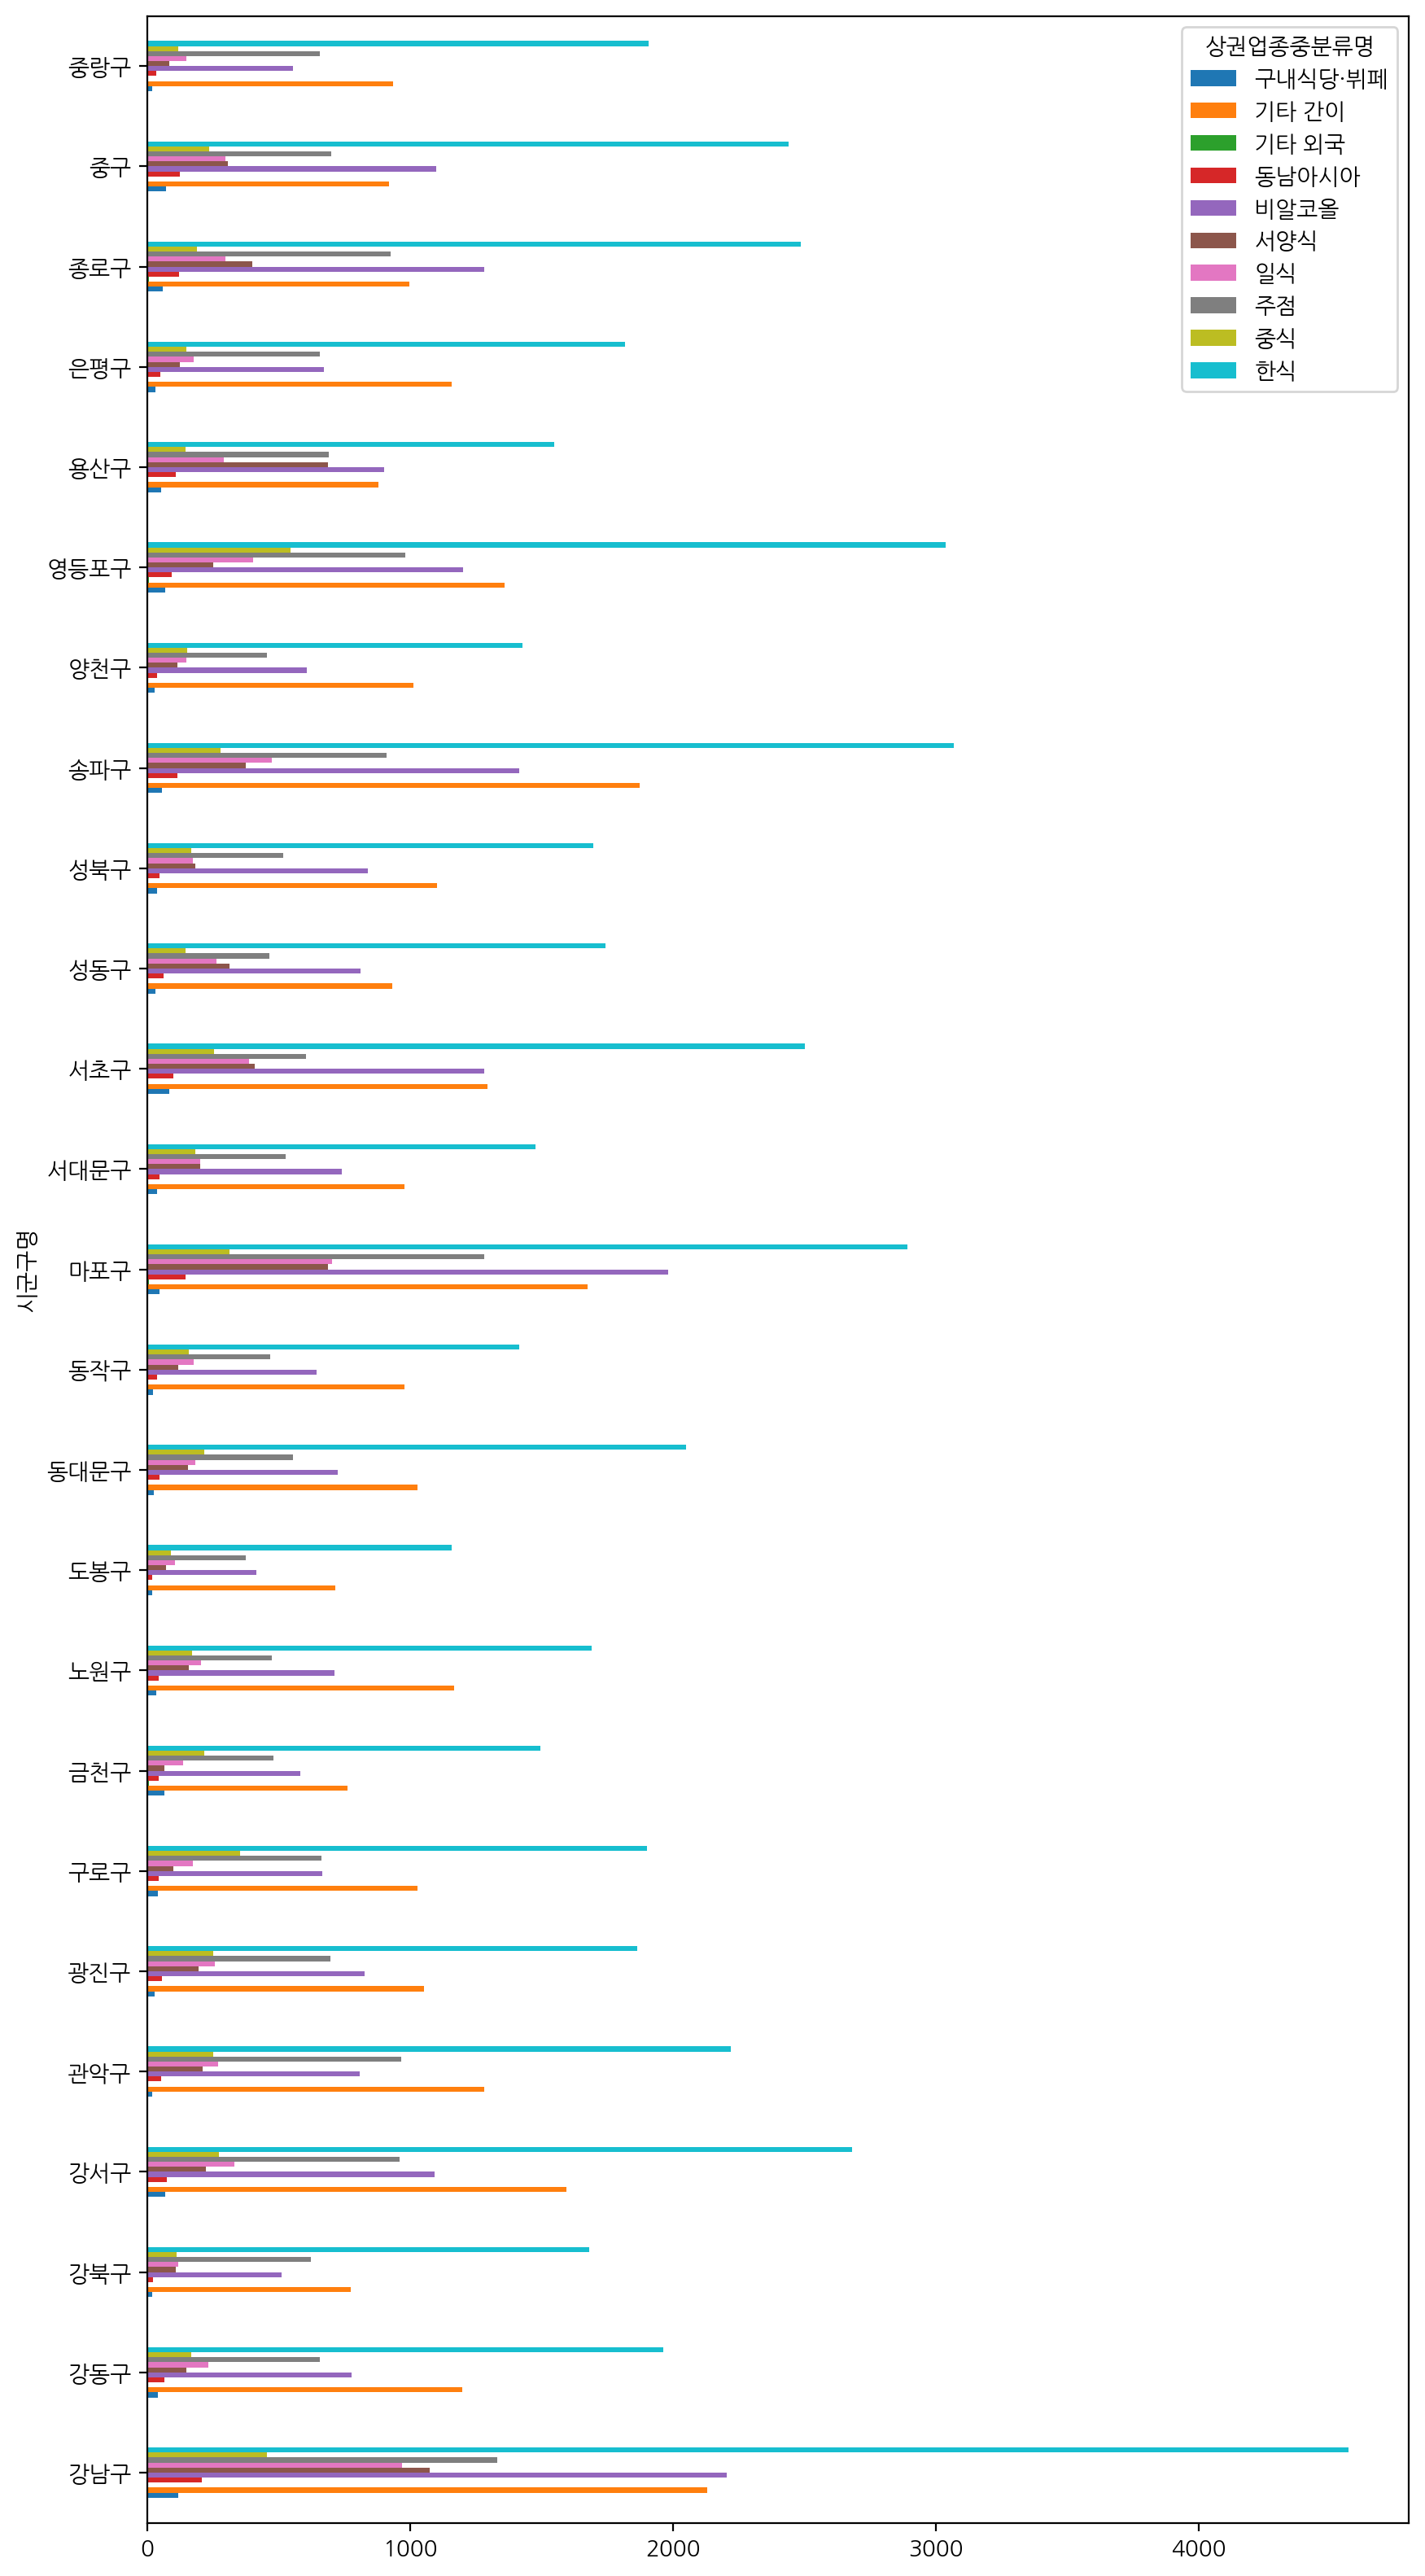

In [85]:
food_gu.unstack().plot.barh(figsize = (10,20))

<Axes: ylabel='상권업종중분류명'>

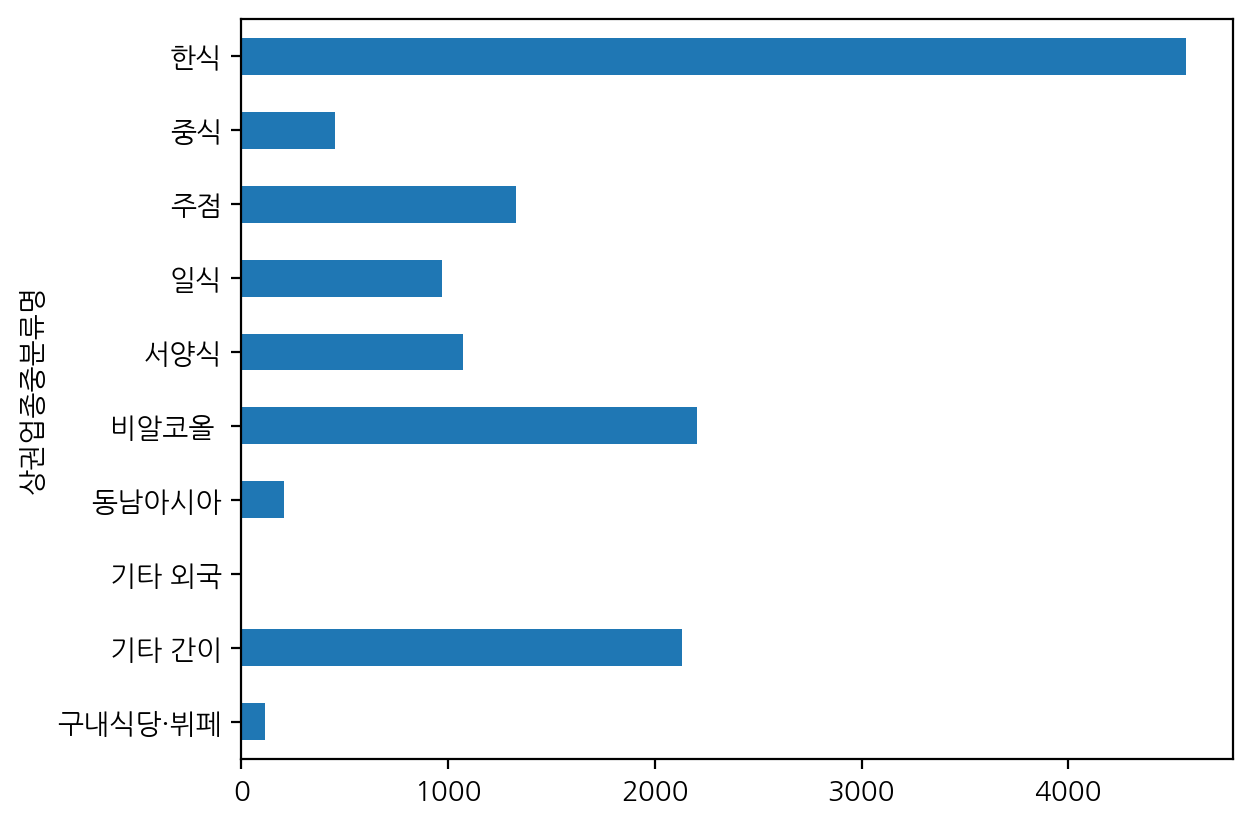

In [86]:
food_gu.unstack().loc['강남구'].plot.barh()

In [87]:
food = food_gu.reset_index()
food

,시군구명,상권업종중분류명,상호명
0,강남구,구내식당·뷔페,116
1,강남구,기타 간이,2130
2,강남구,기타 외국,1
3,강남구,동남아시아,207
4,강남구,비알코올,2204
...,...,...,...
235,중랑구,서양식,84
236,중랑구,일식,148
237,중랑구,주점,657
238,중랑구,중식,117


In [88]:
food.rename(columns = {'상호명':'상호수'},inplace=True)
food

,시군구명,상권업종중분류명,상호수
0,강남구,구내식당·뷔페,116
1,강남구,기타 간이,2130
2,강남구,기타 외국,1
3,강남구,동남아시아,207
4,강남구,비알코올,2204
...,...,...,...
235,중랑구,서양식,84
236,중랑구,일식,148
237,중랑구,주점,657
238,중랑구,중식,117


<Axes: xlabel='시군구명', ylabel='상호수'>

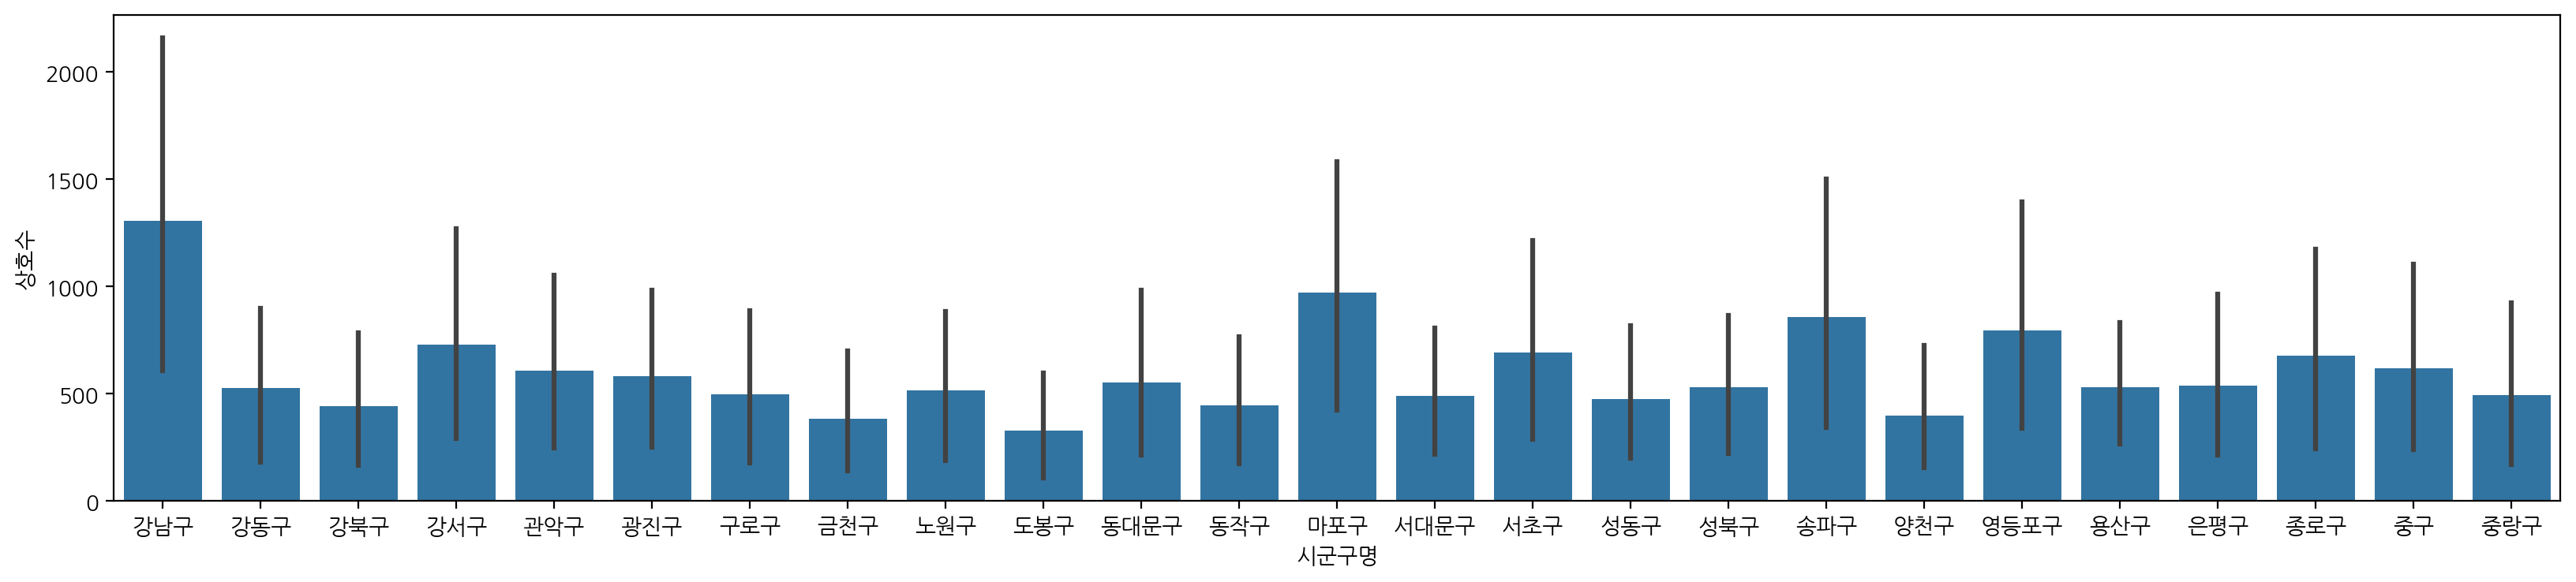

In [89]:
plt.figure(figsize = (20,4))
sns.barplot(data = food, x = '시군구명',y ='상호수')

<Axes: xlabel='시군구명', ylabel='상호수'>

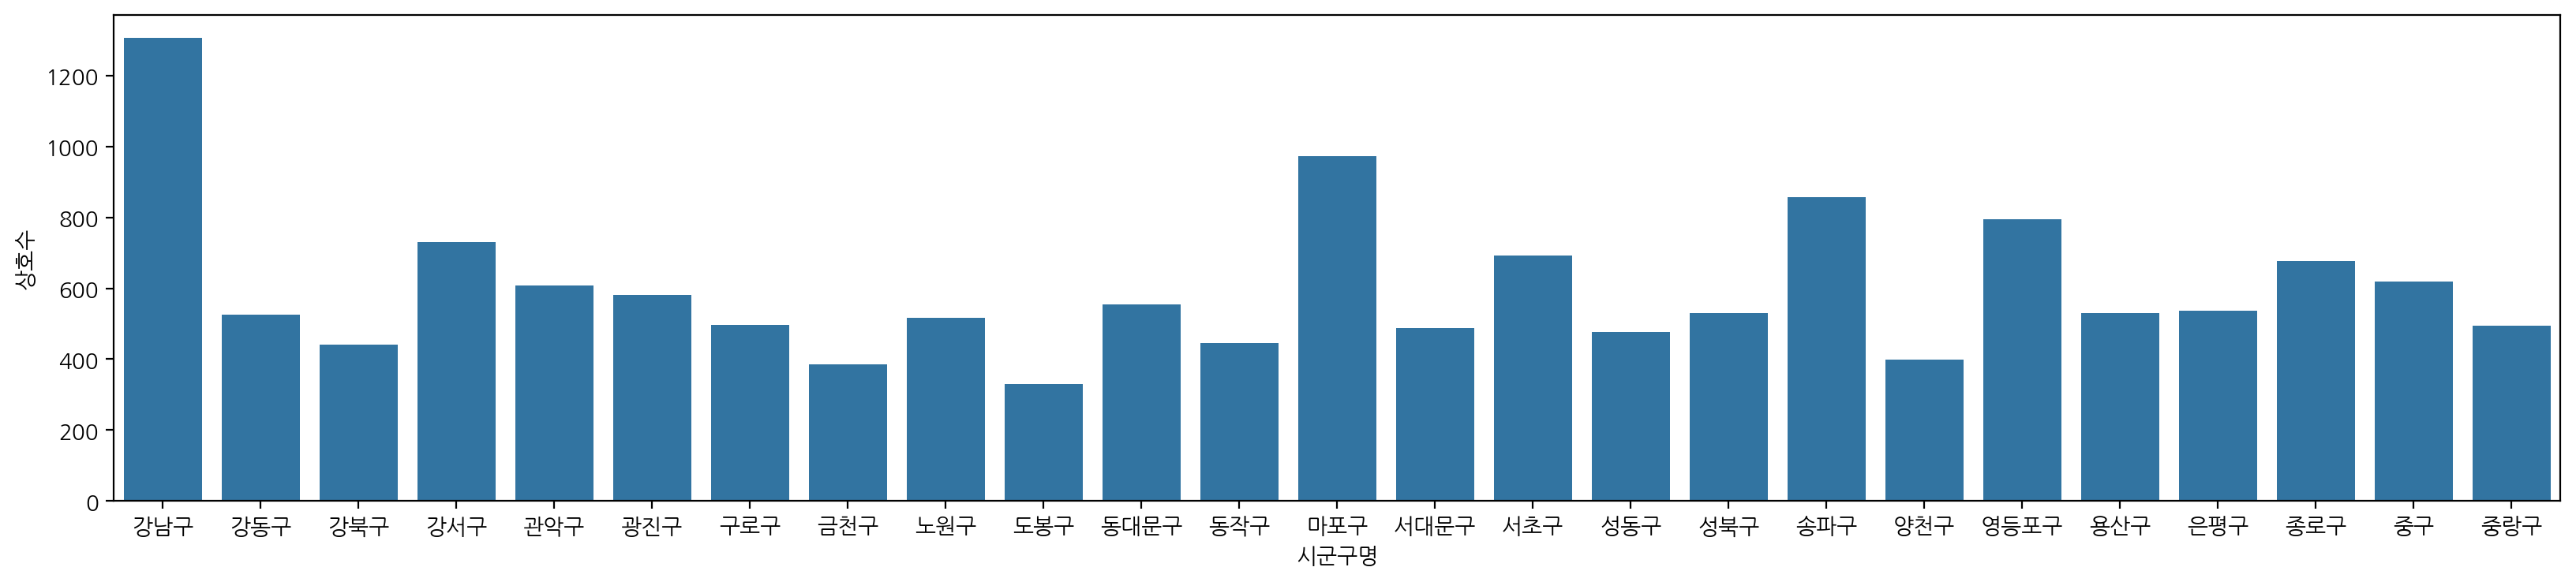

In [90]:
# 검은색 선(상권업종중분류명별로 그려지지 않았기 때문에 생기는 선) 없애기
plt.figure(figsize = (20,4))

sns.barplot(data = food, x = '시군구명',y ='상호수', errorbar = None)

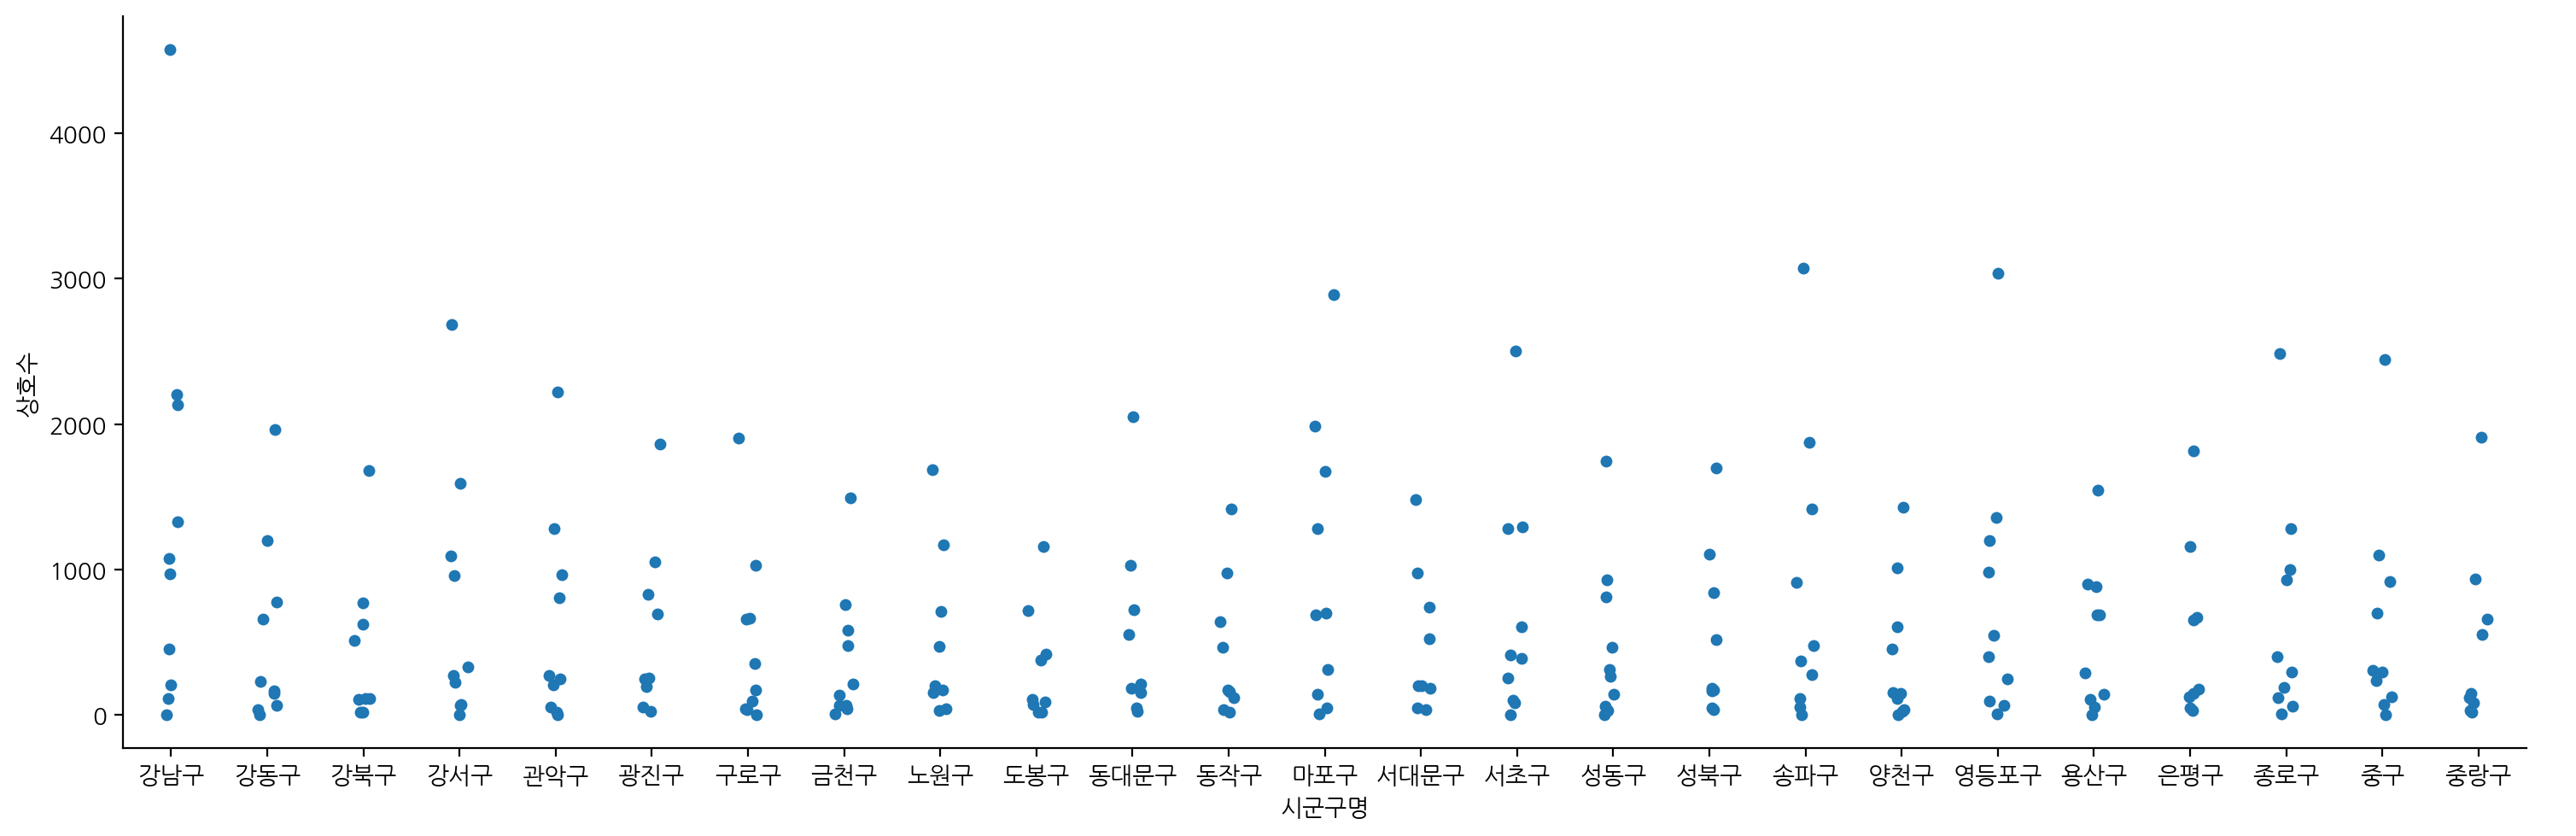

In [91]:
# 카테고리형 그래프 -> catplot()
# 프레임 사이즈 조정 -> figure() X, aspect O
sns.catplot(data = food, x = '시군구명', y='상호수', aspect=3)

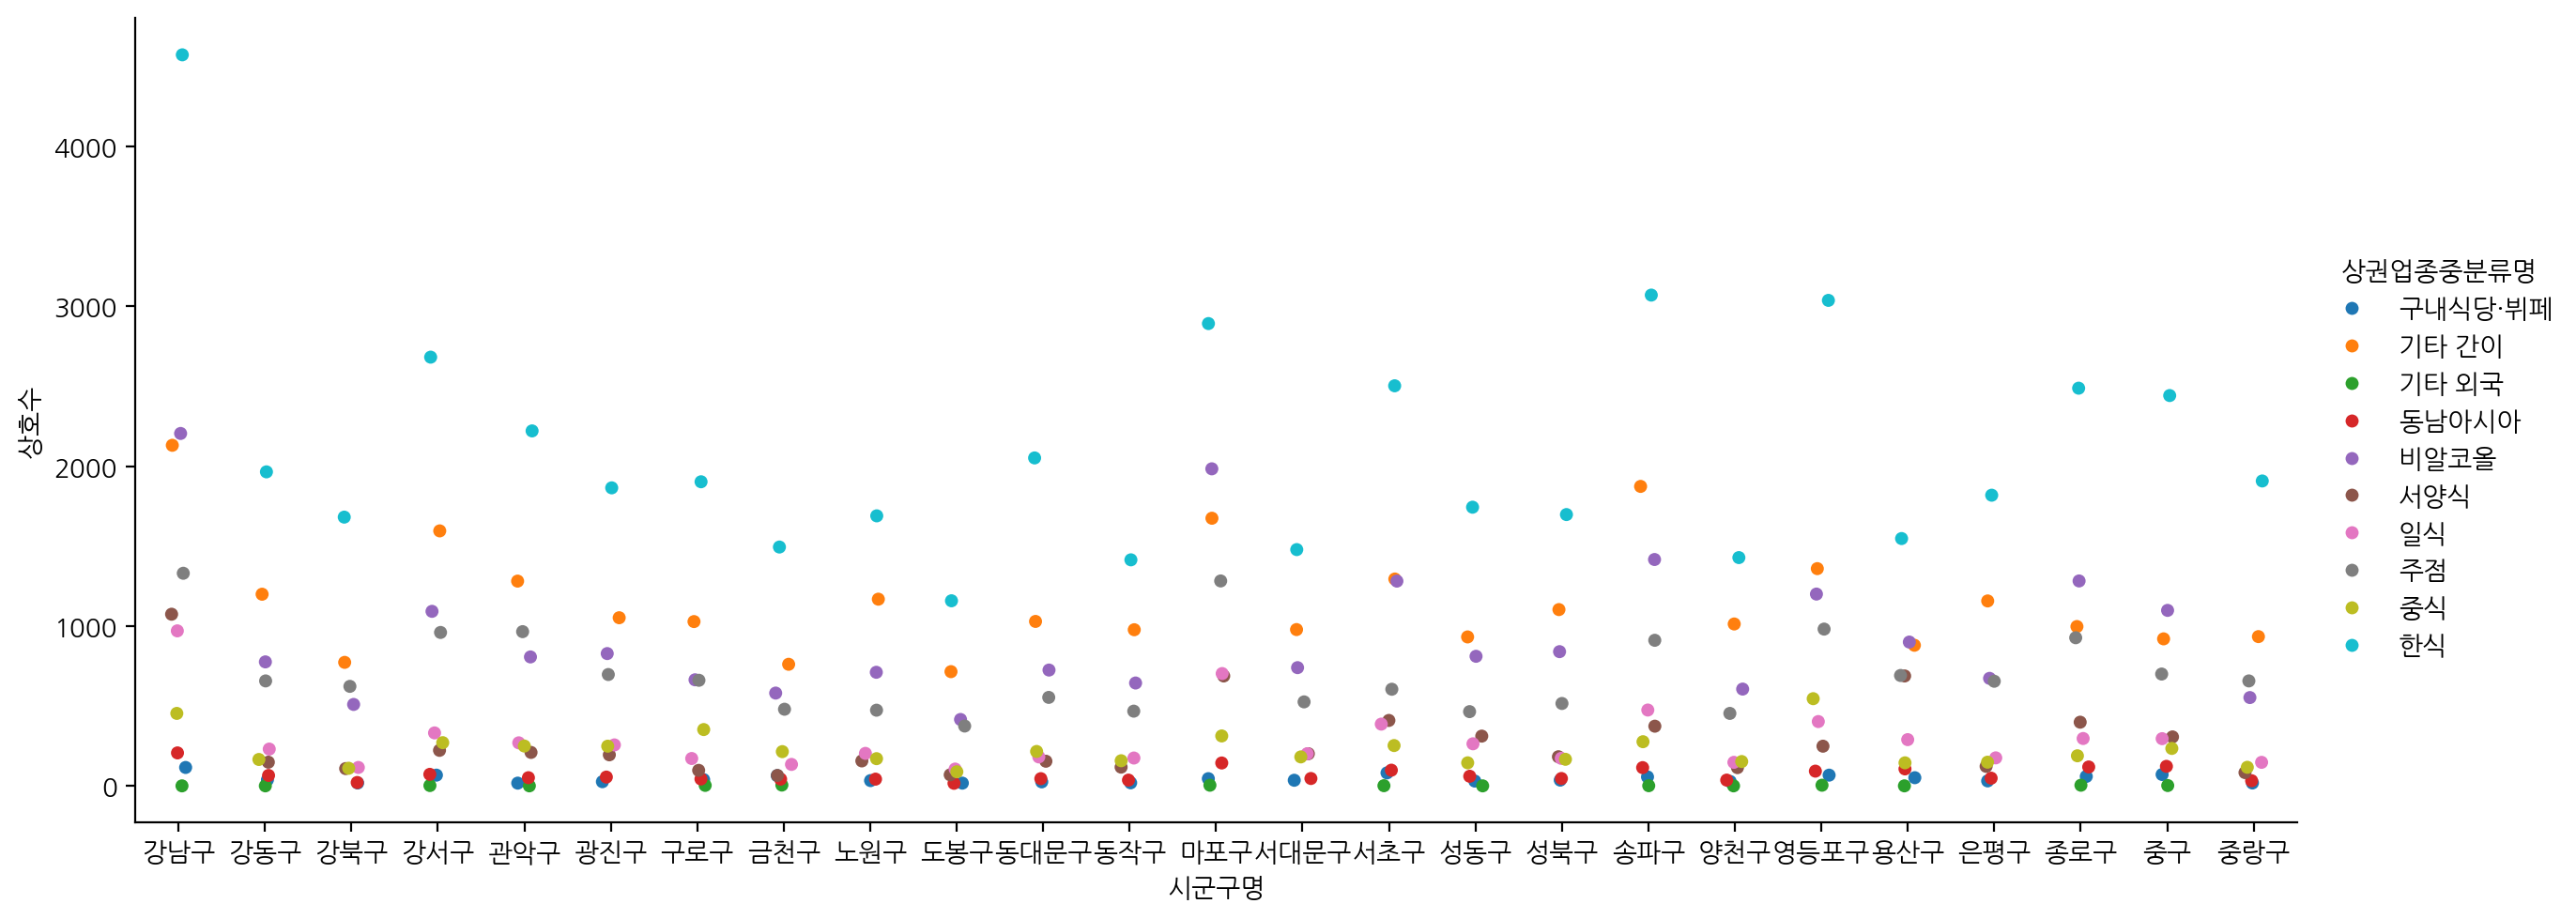

In [94]:
# catplot 의 기본 그래프 표현은 산점도(scatterplot)
sns.catplot(data = food, x = '시군구명', y='상호수', aspect=2.5, hue = '상권업종중분류명')

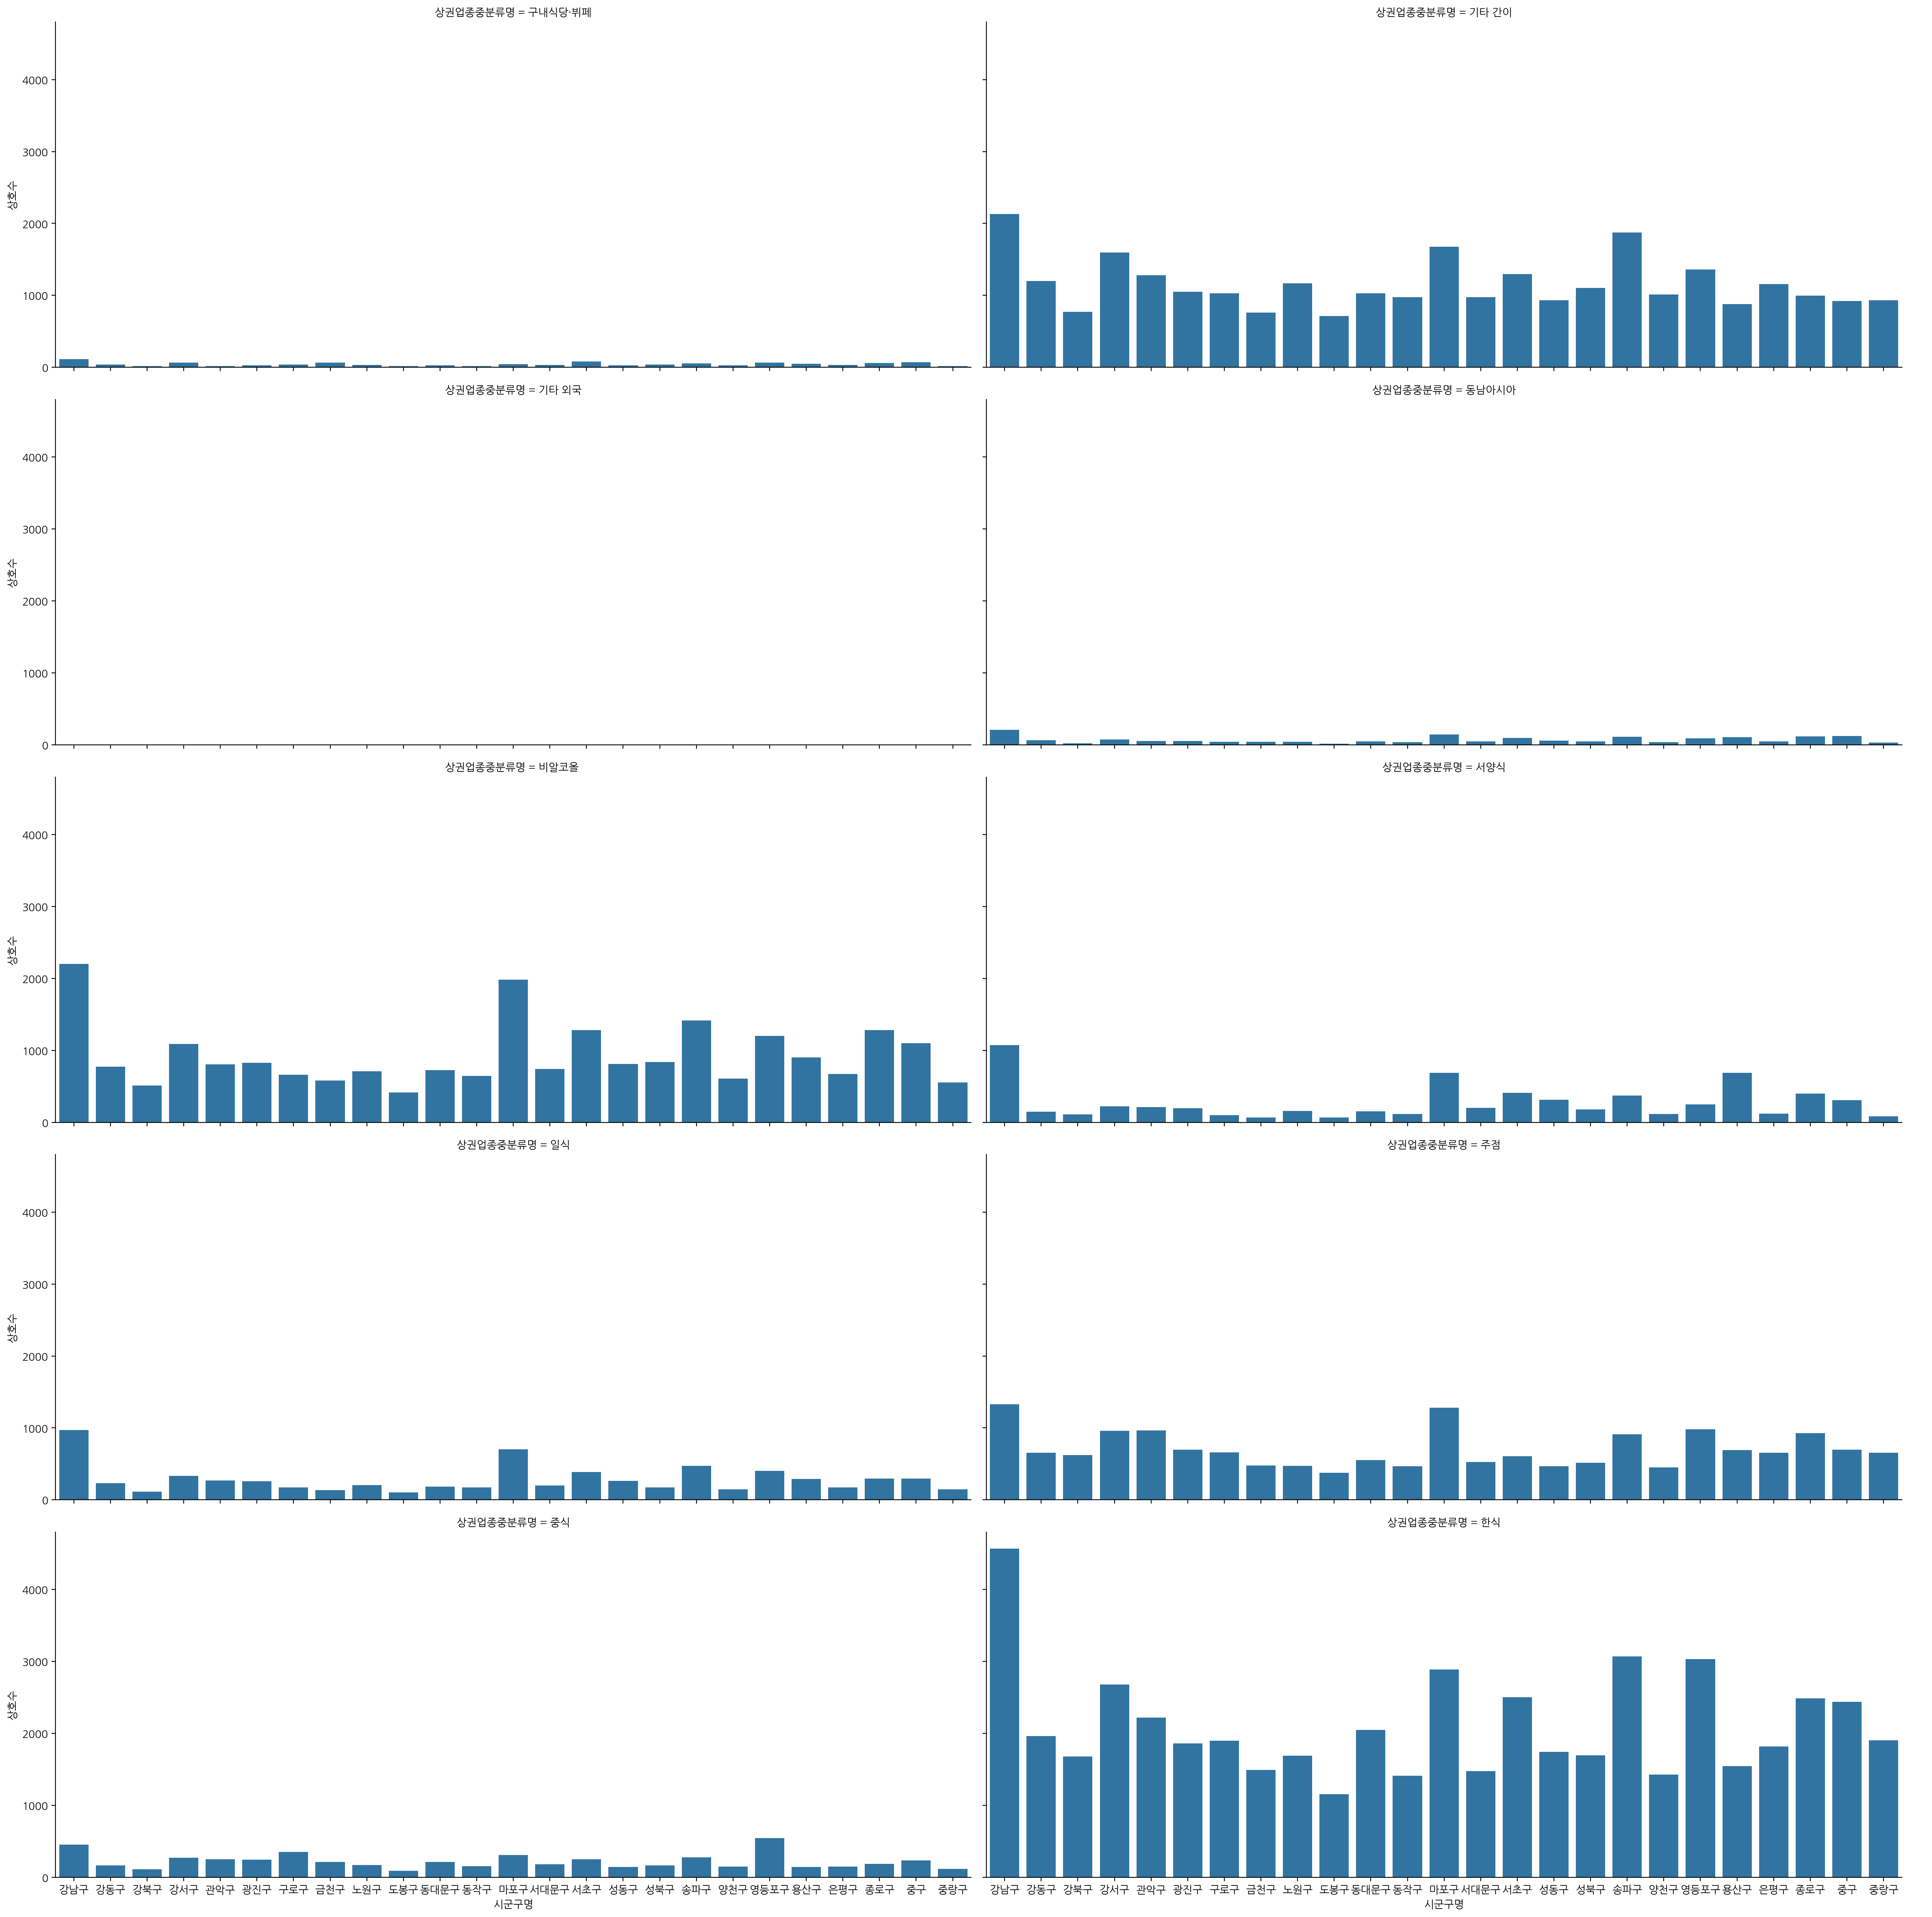

In [100]:
# catplot 의 기본 그래프 표현은 산점도(scatterplot)
sns.catplot(data = food, x = '시군구명', y='상호수', aspect=2.5, col = '상권업종중분류명', col_wrap = 2,kind = 'bar')

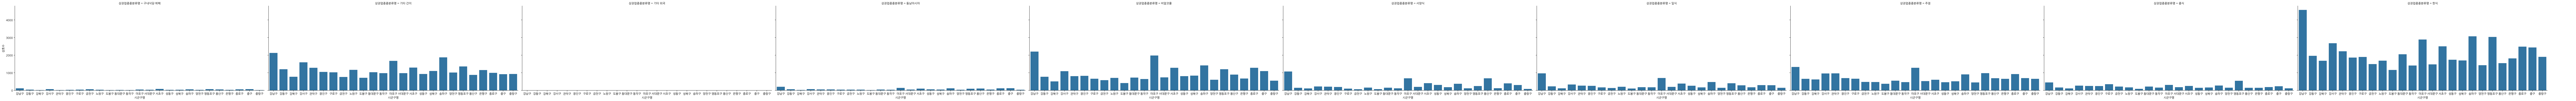

In [99]:
# 상권업종중분류명별 각각 차트 생성하기
sns.catplot(data = food, x = '시군구명', y='상호수', aspect=2.5, col = '상권업종중분류명', kind = 'bar')

# Day0411

In [93]:
df['상권업종대분류명'] = '음식'